In [1]:
import utils
import matplotlib.pyplot as pl
import numpy as np
import sys
import imp
import plots
imp.reload(utils)
imp.reload(plots)
sys.path.append("../libra")
from libra import transit_model, kepler296
%matplotlib inline

def transit(t, t0, r, d):
    trans = np.ones(len(t))
    trans[(t<(t0+d/2))&(t>(t0-d/2))] = 1-(r**2)
    return trans

def trapezoidal_transit(t, t0, r, d, tin):
    trans = np.ones(len(t))
    t1 = (t0-d/2-tin)
    t2 = (t0-d/2)
    t3 = (t0+d/2)
    t4 = (t0+d/2+tin)
    intransit = (t<=t3)&(t>=t2)
    ingress = (t<t2)&(t>t1)
    egress = (t<t4)&(t>t3)
    trans[intransit] = 1-(r**2)
    trans[ingress] = 1 -(t[ingress]-t1)*(r**2)/tin
    trans[egress] = (1 - (r**2))+(t[egress]-t3)*(r**2)/tin
    return trans

In [ ]:
wn_small = -9.315700887634009
wn_large = -7.706262975199909 
rp_small = 0.025102522274122838 
rp_large = 0.05301048094385504
d_small = 0.016416999724779762
d_large = 0.410424993119494 
c_small = 1.1 
c_large = 1.5

rp = [rp_small, rp_large]
d = [d_small, d_large]
wn = [wn_small, wn_large]
c = [c_small, c_large]

rplabels = ["shallow", "deep"]
dlabels = ["short", "long"]
wnlabels = ["clean", "noisy"]
clabels = ["low", "high"]

#import imp
#imp.reload(plots)
for runcode in ids:
    rp_true = rp[int(runcode[1])]
    d_true = d[int(runcode[2])]
    fig, axs = pl.subplots(1, 4, figsize=(40, 5))
    axs = plots.make_histogram(axs, monopath.format(runcode), polypath.format(runcode), ['rp', 'd', 't0', 'tin'], [rp_true, d_true, 0.0, 0.05])
    for i in range(len(axs)):
        axs[i].set_ylabel("density")
        axs[i].set_xlabel("value")
    fig.suptitle(runcode)

In [14]:
log_w = 2
log_q = np.log(1/np.sqrt(2))
log_s = -16

tin = 0.05

wn_small =-9.315700887634009
wn_large =-7.706262975199909 
rp_small = 0.025102522274122838 
rp_large = 0.04301048094385504
d_small = 0.040416999724779762
d_large = 0.410424993119494 
c_small = 1.1 
c_large = 1.5

rp = [rp_small, rp_large]
d = [d_small, d_large]
wn = [wn_small, wn_large]
c = [c_small, c_large]

#i, j, k, l = int(runcode[0]), int(runcode[1]), int(runcode[2]), int(runcode[3])

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


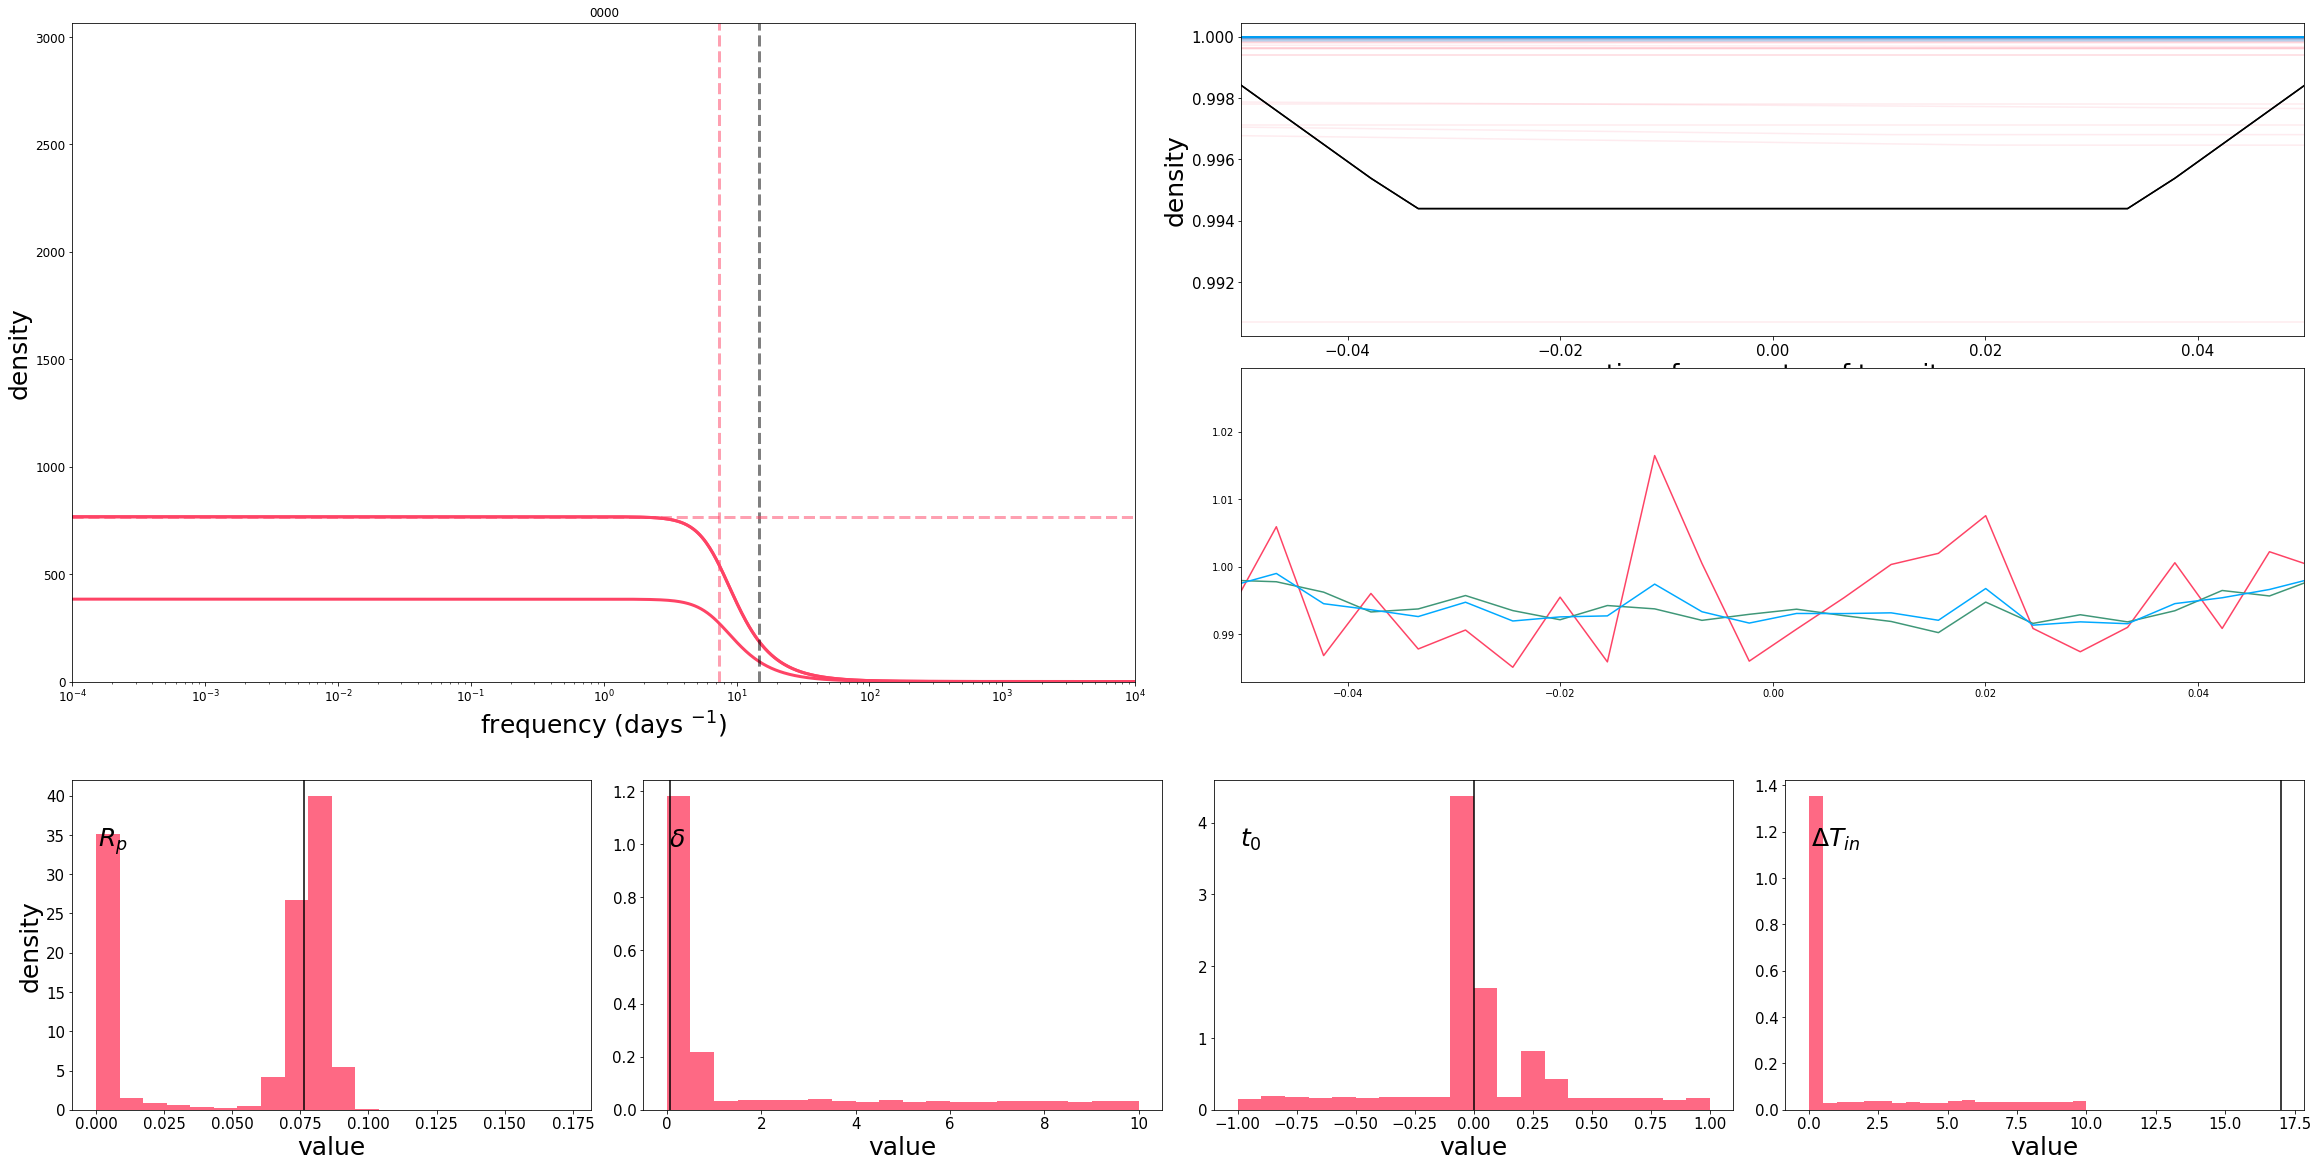

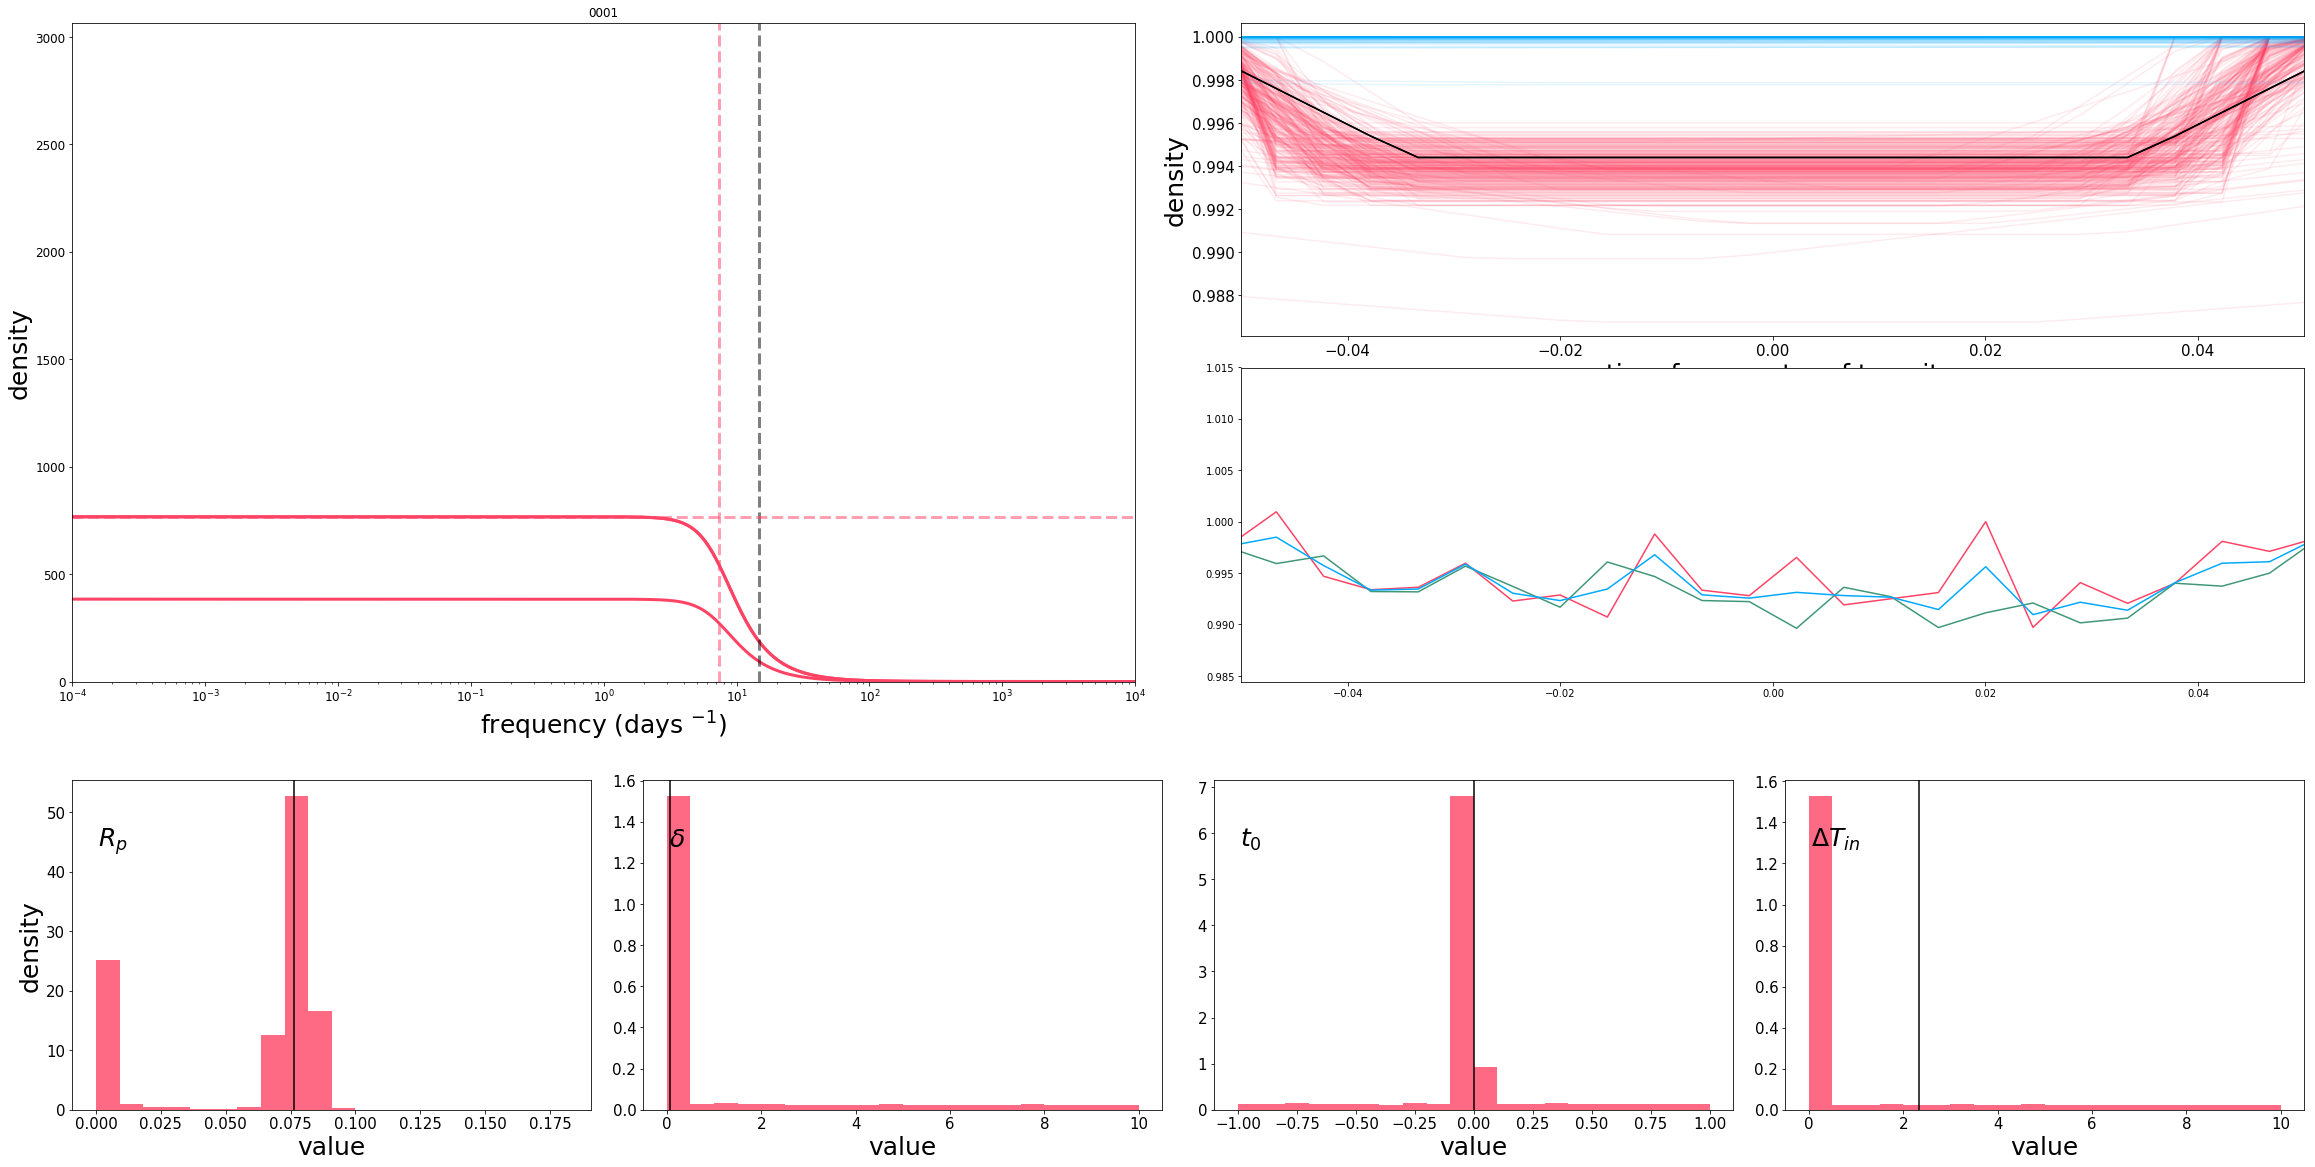

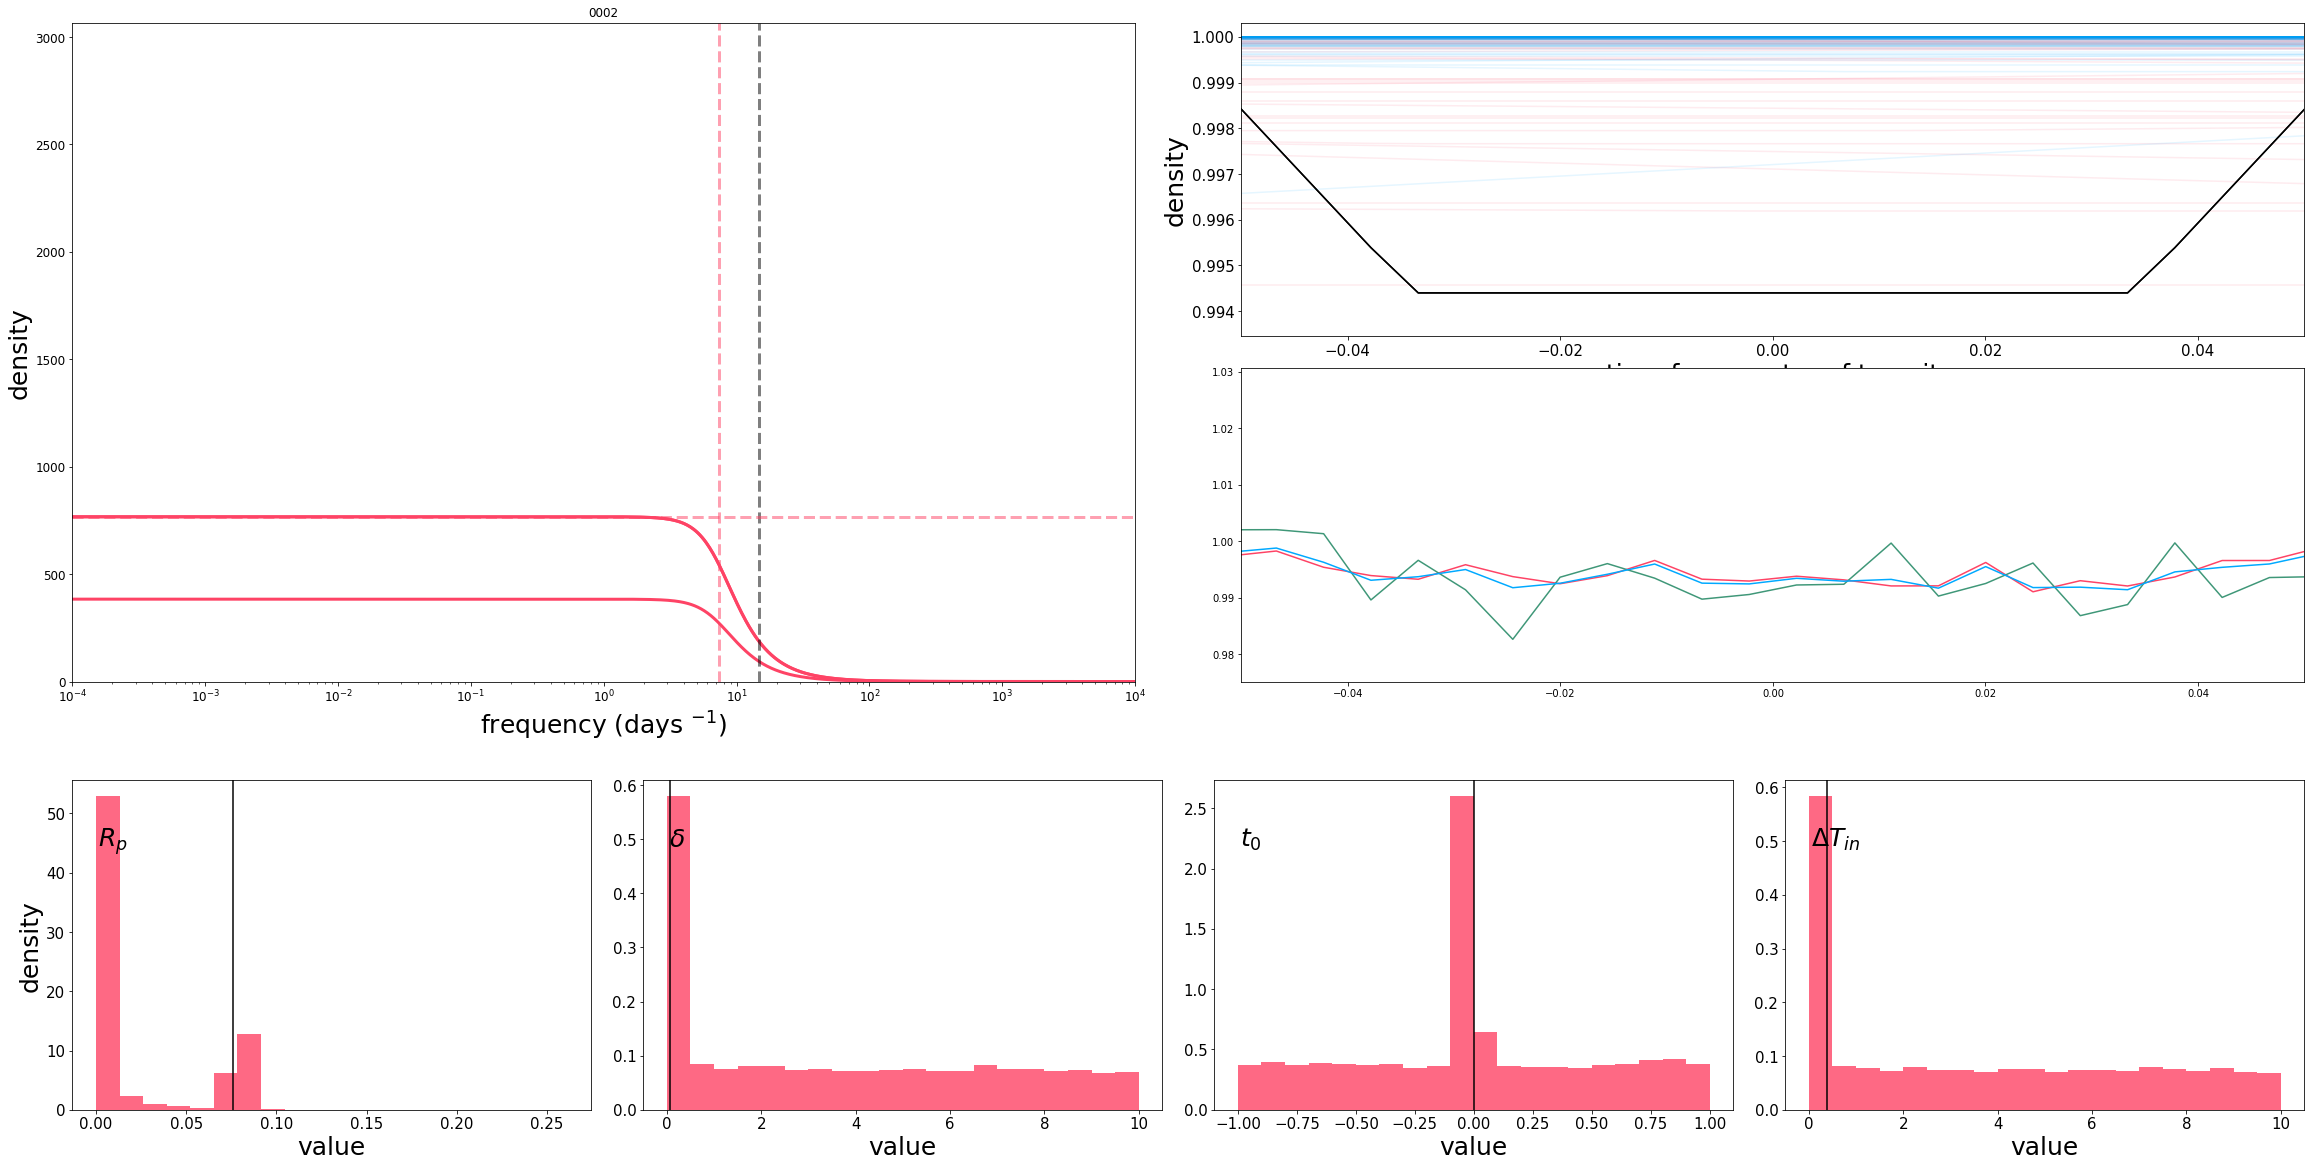

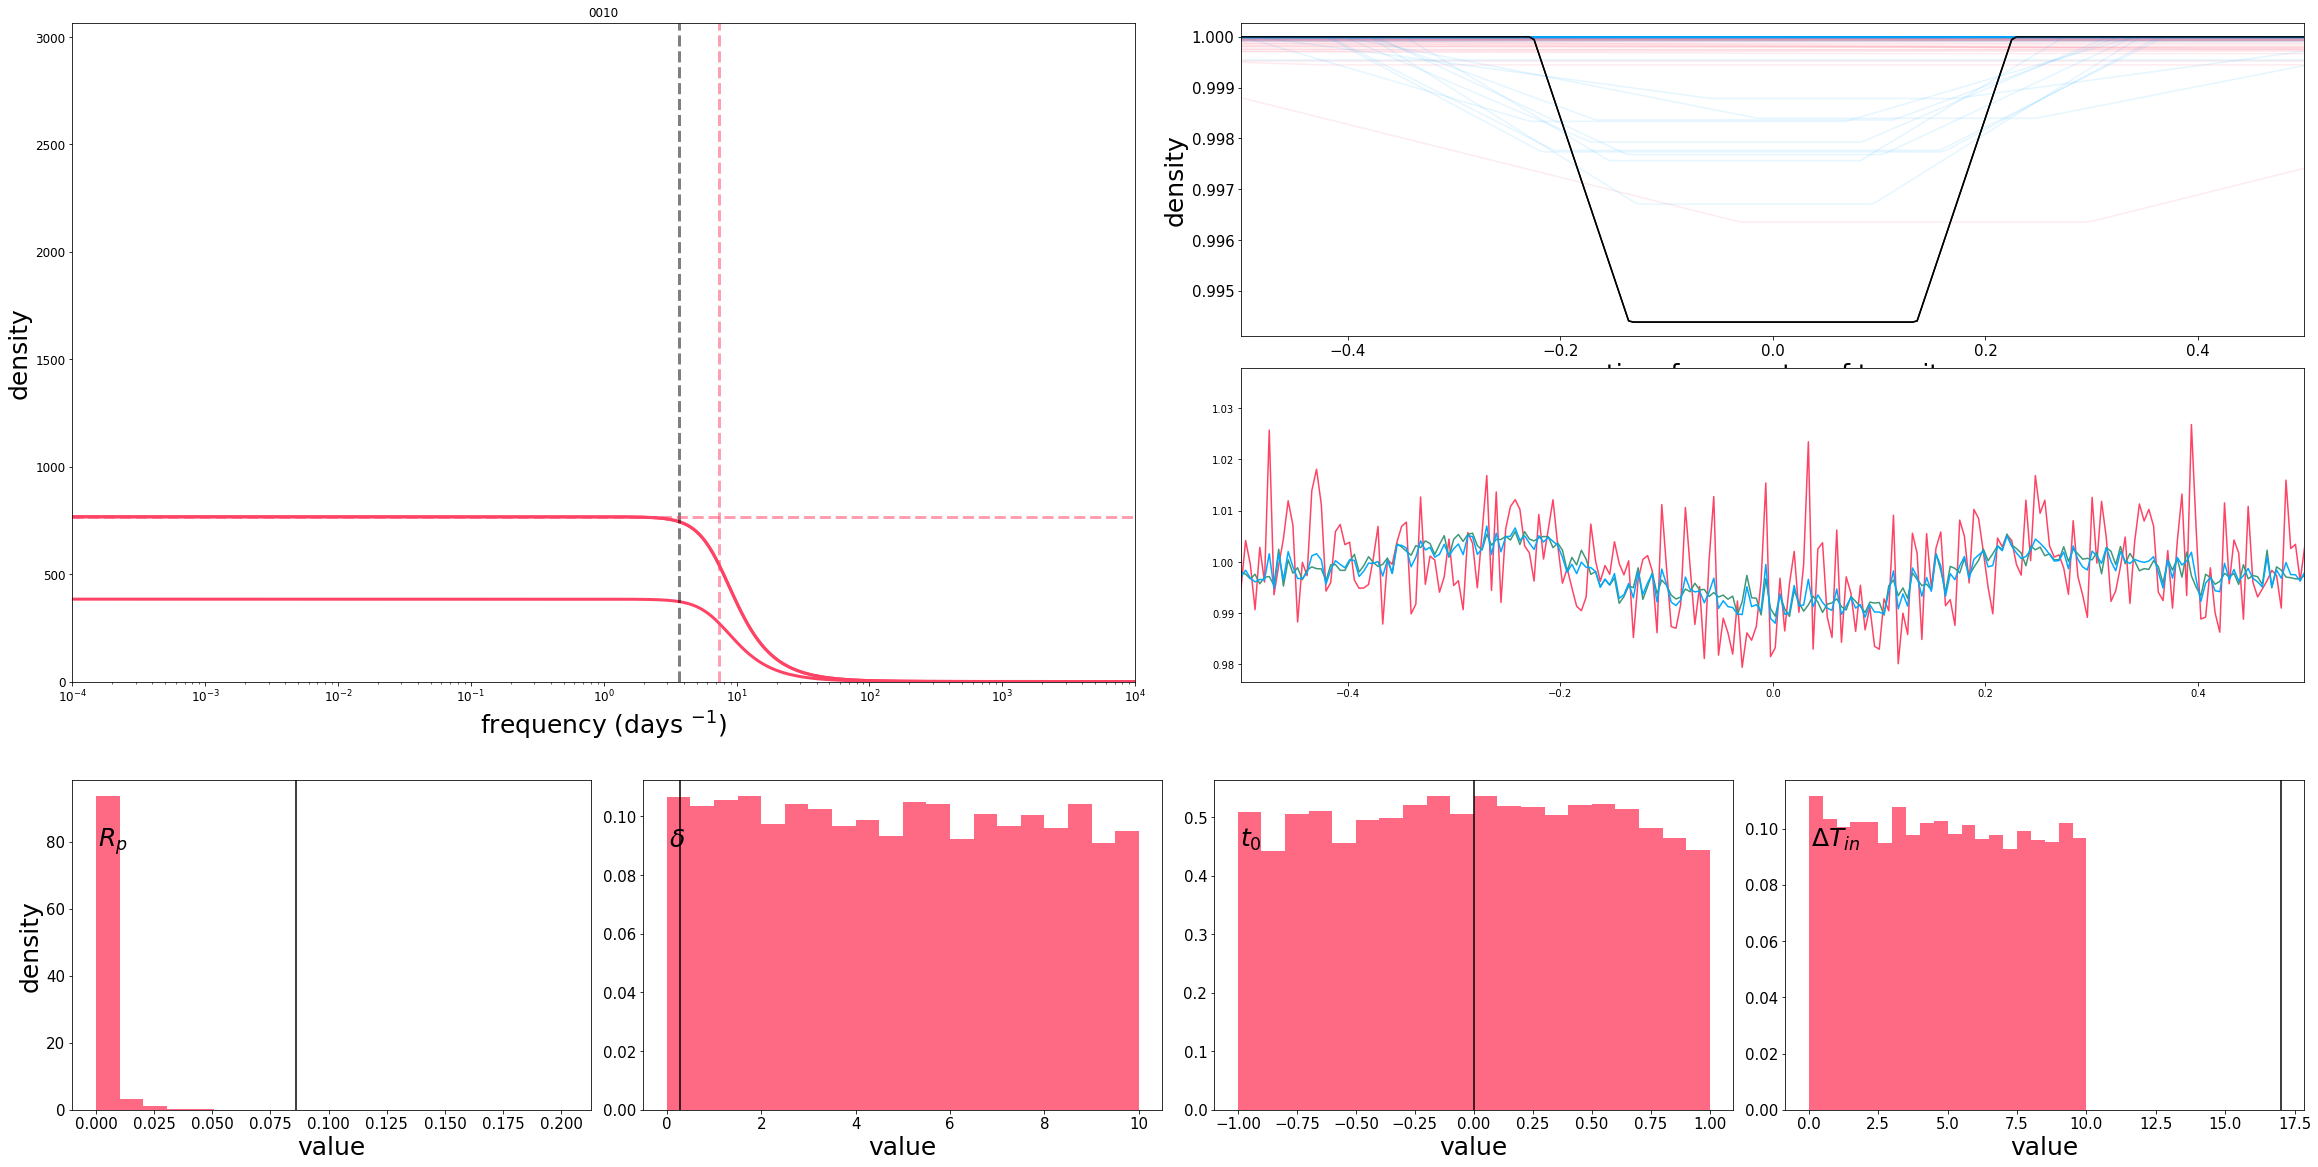

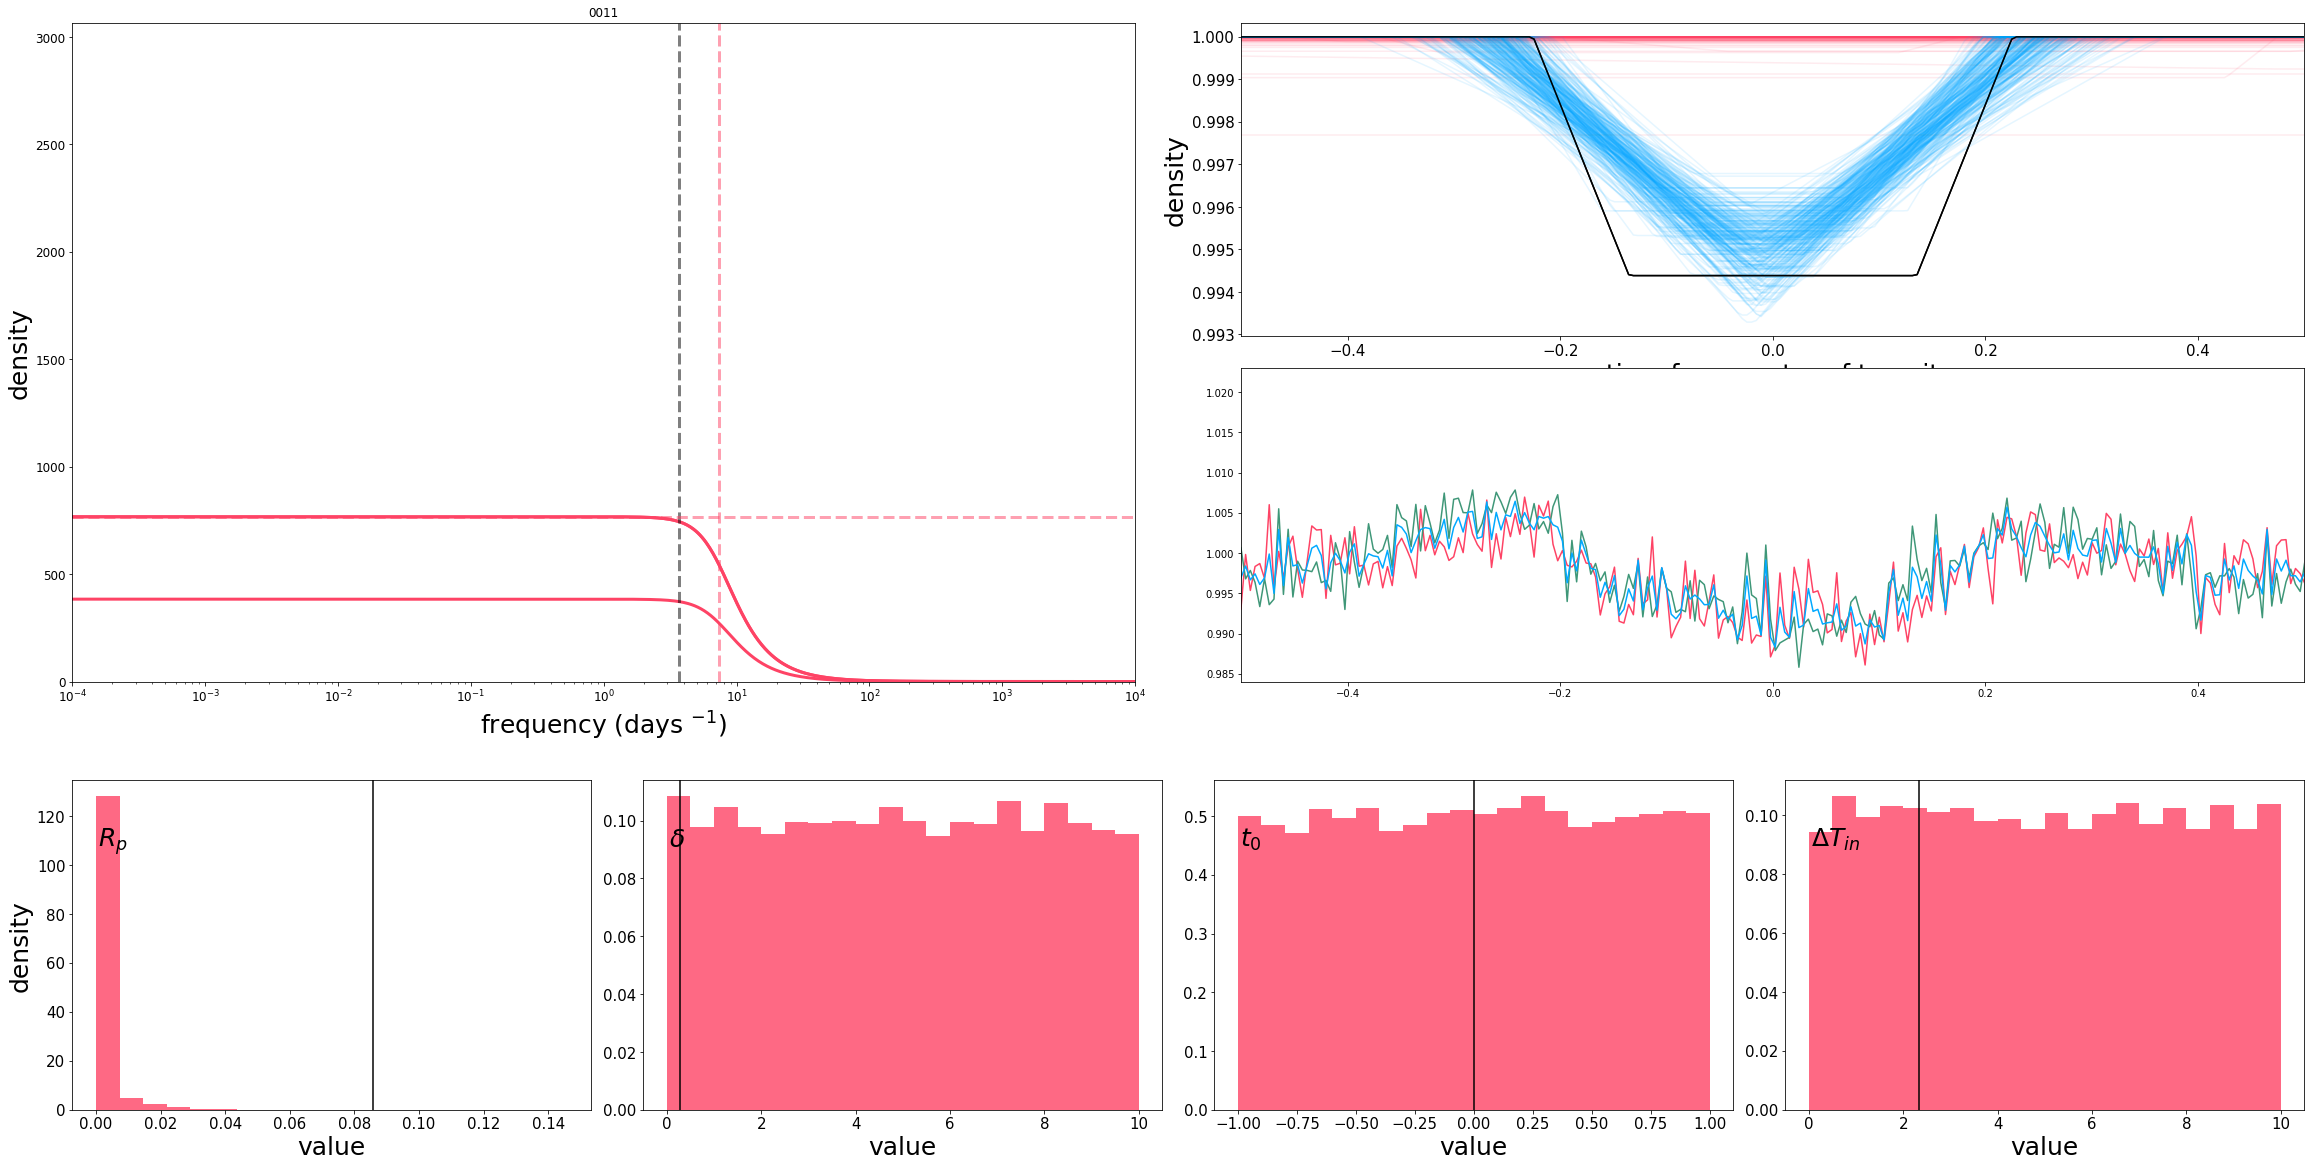

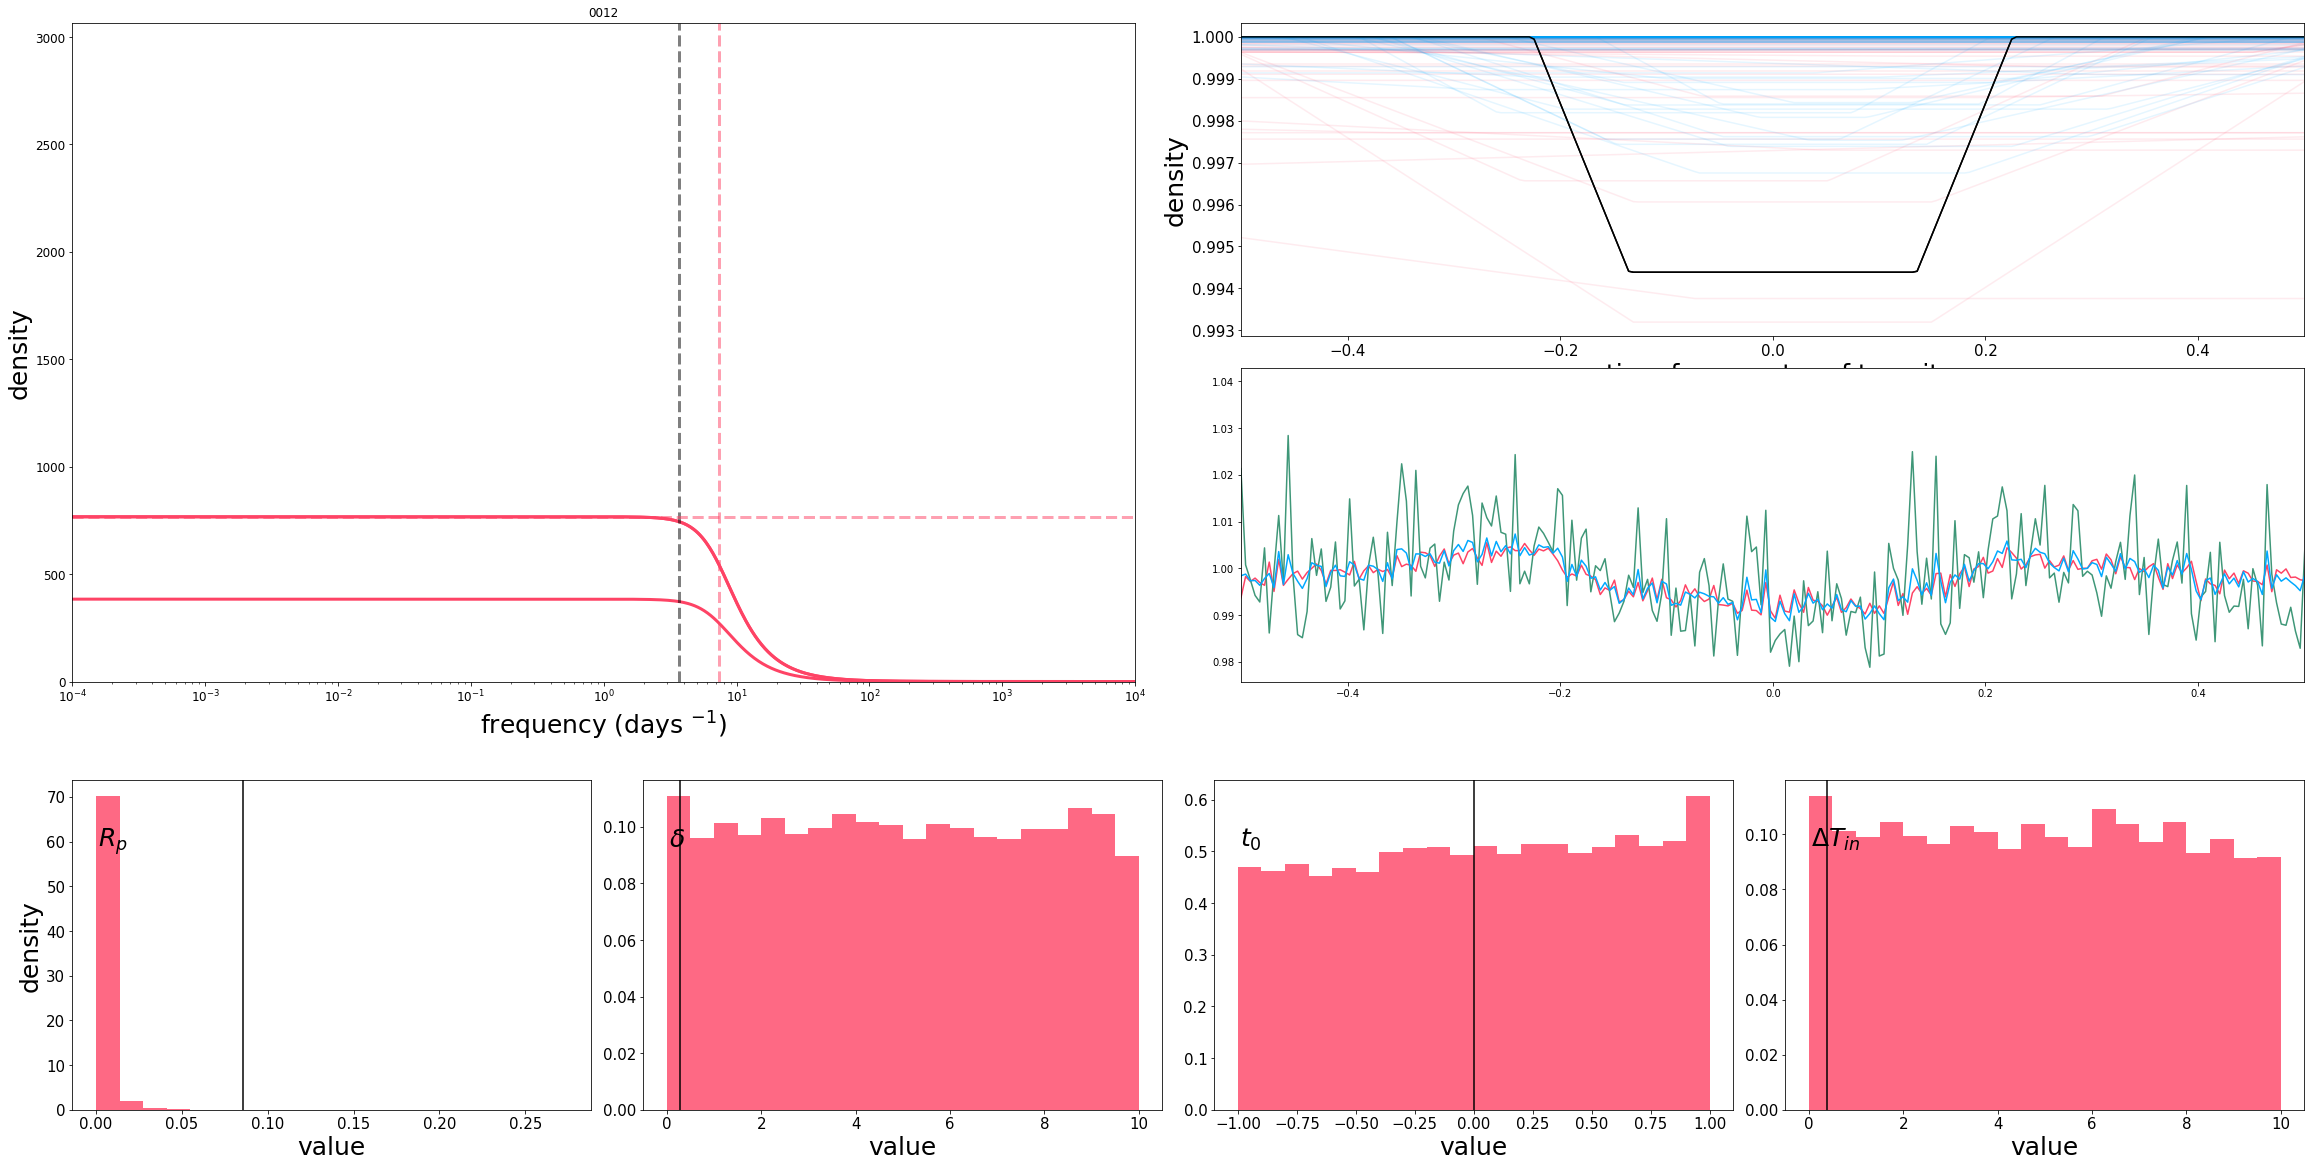

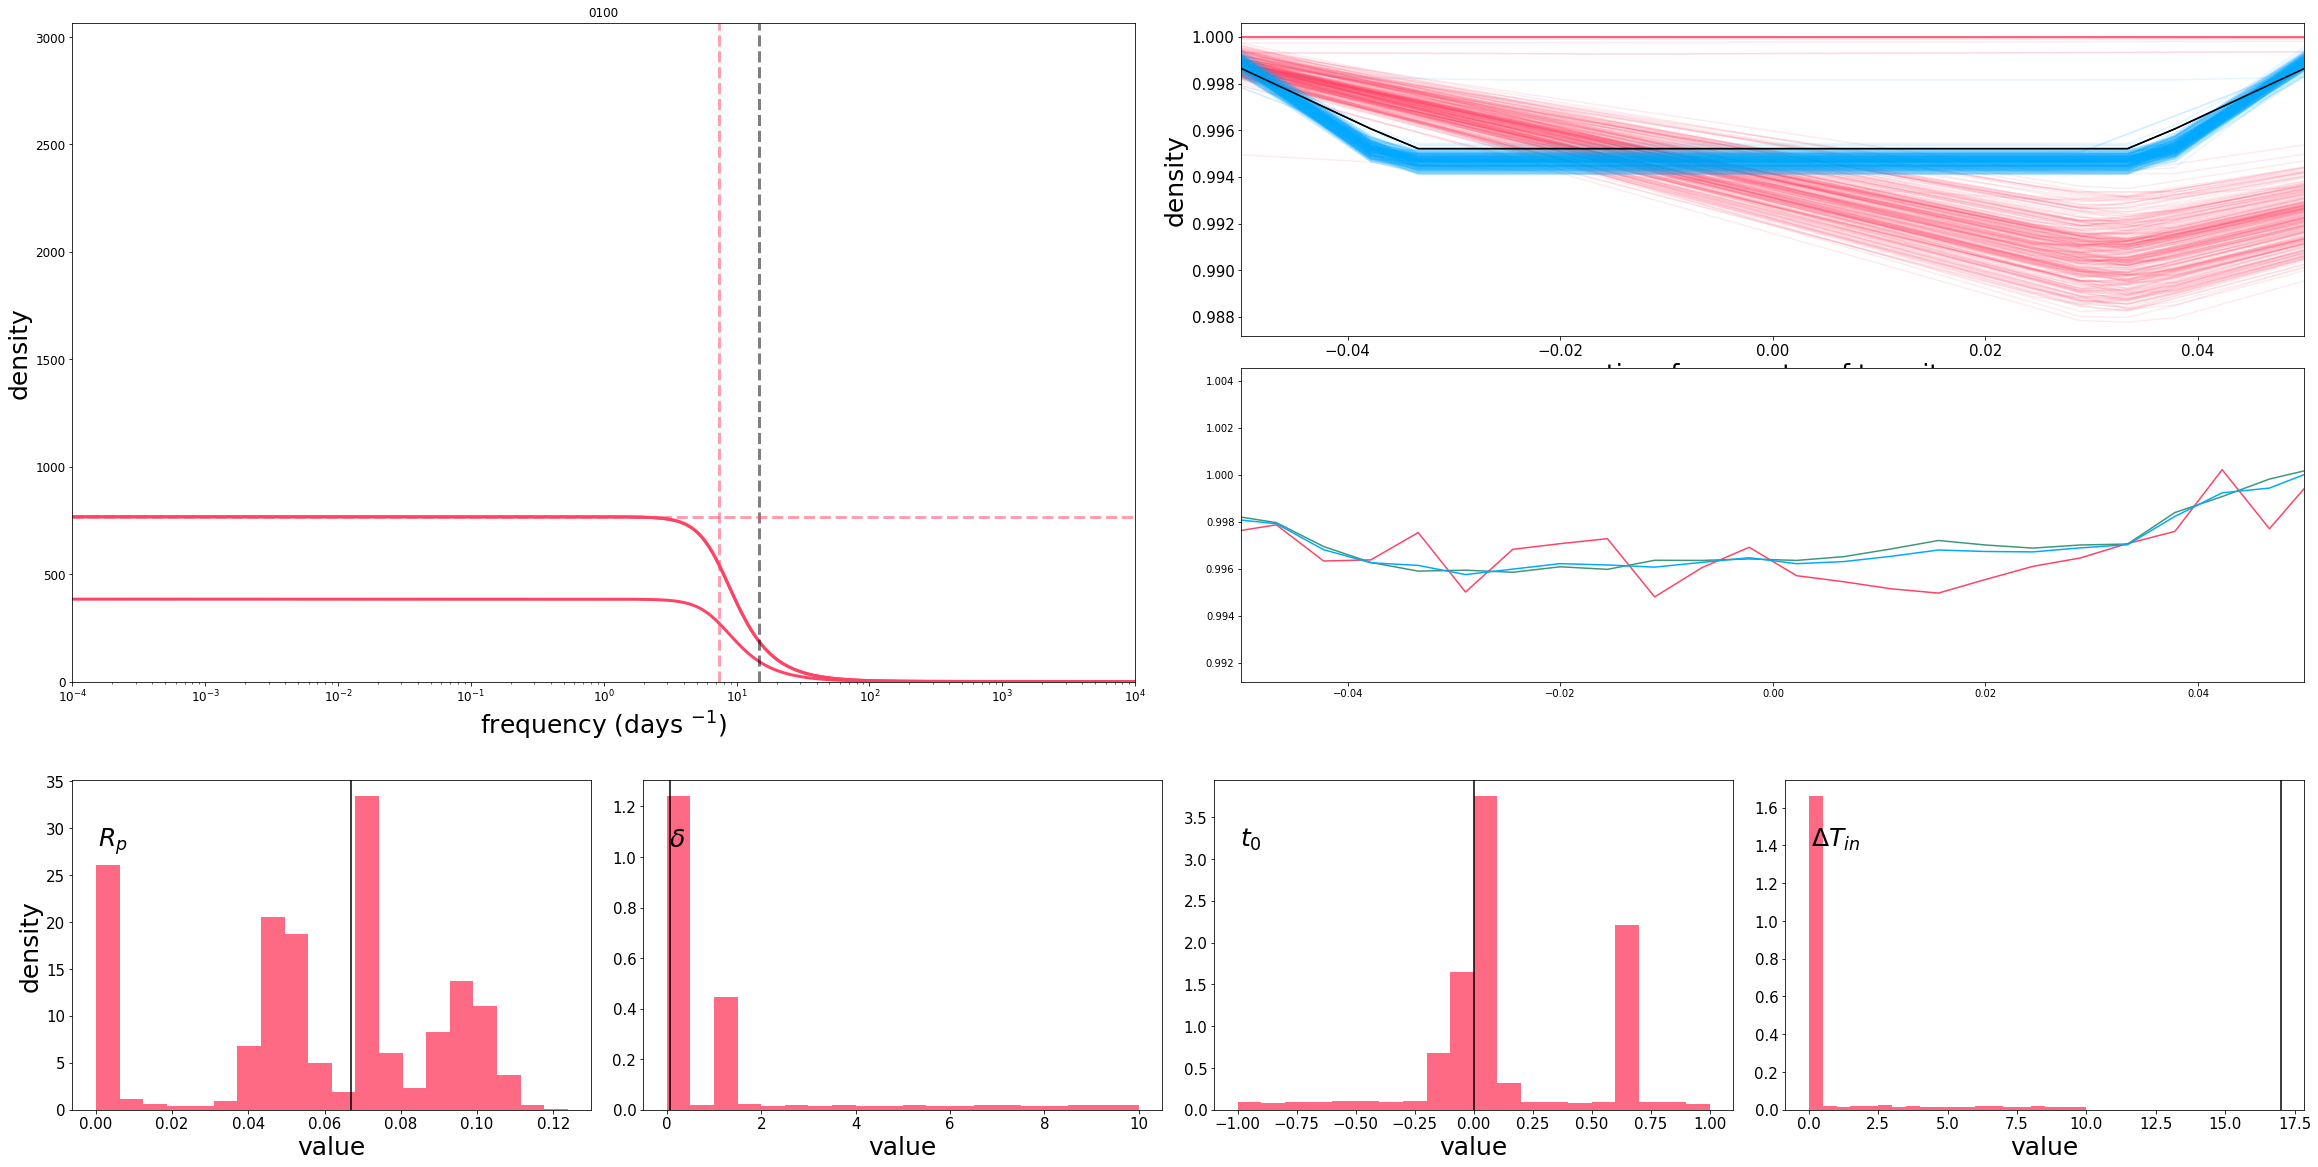

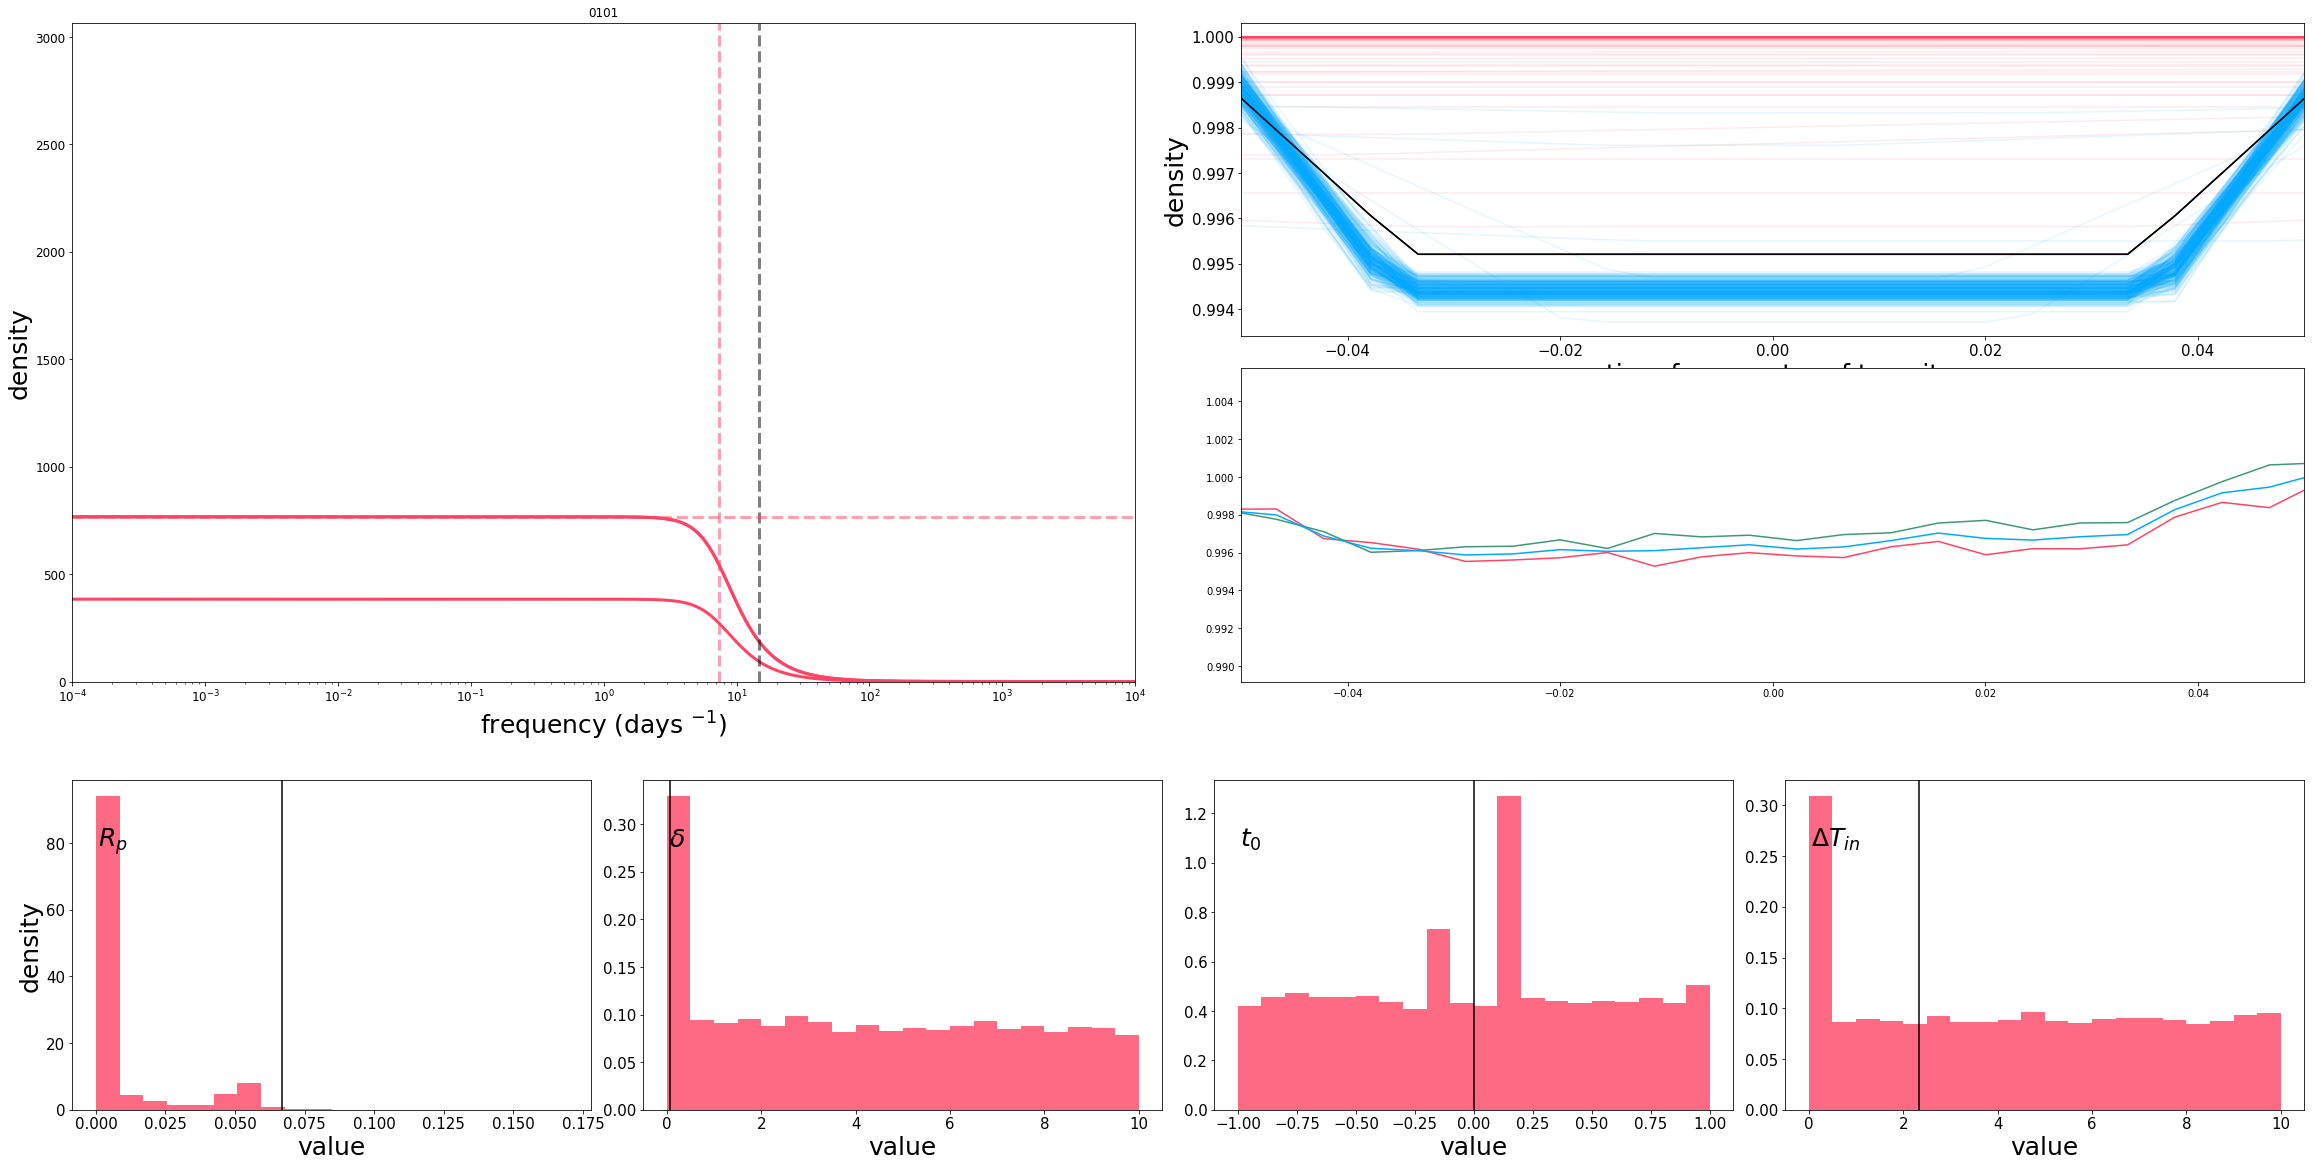

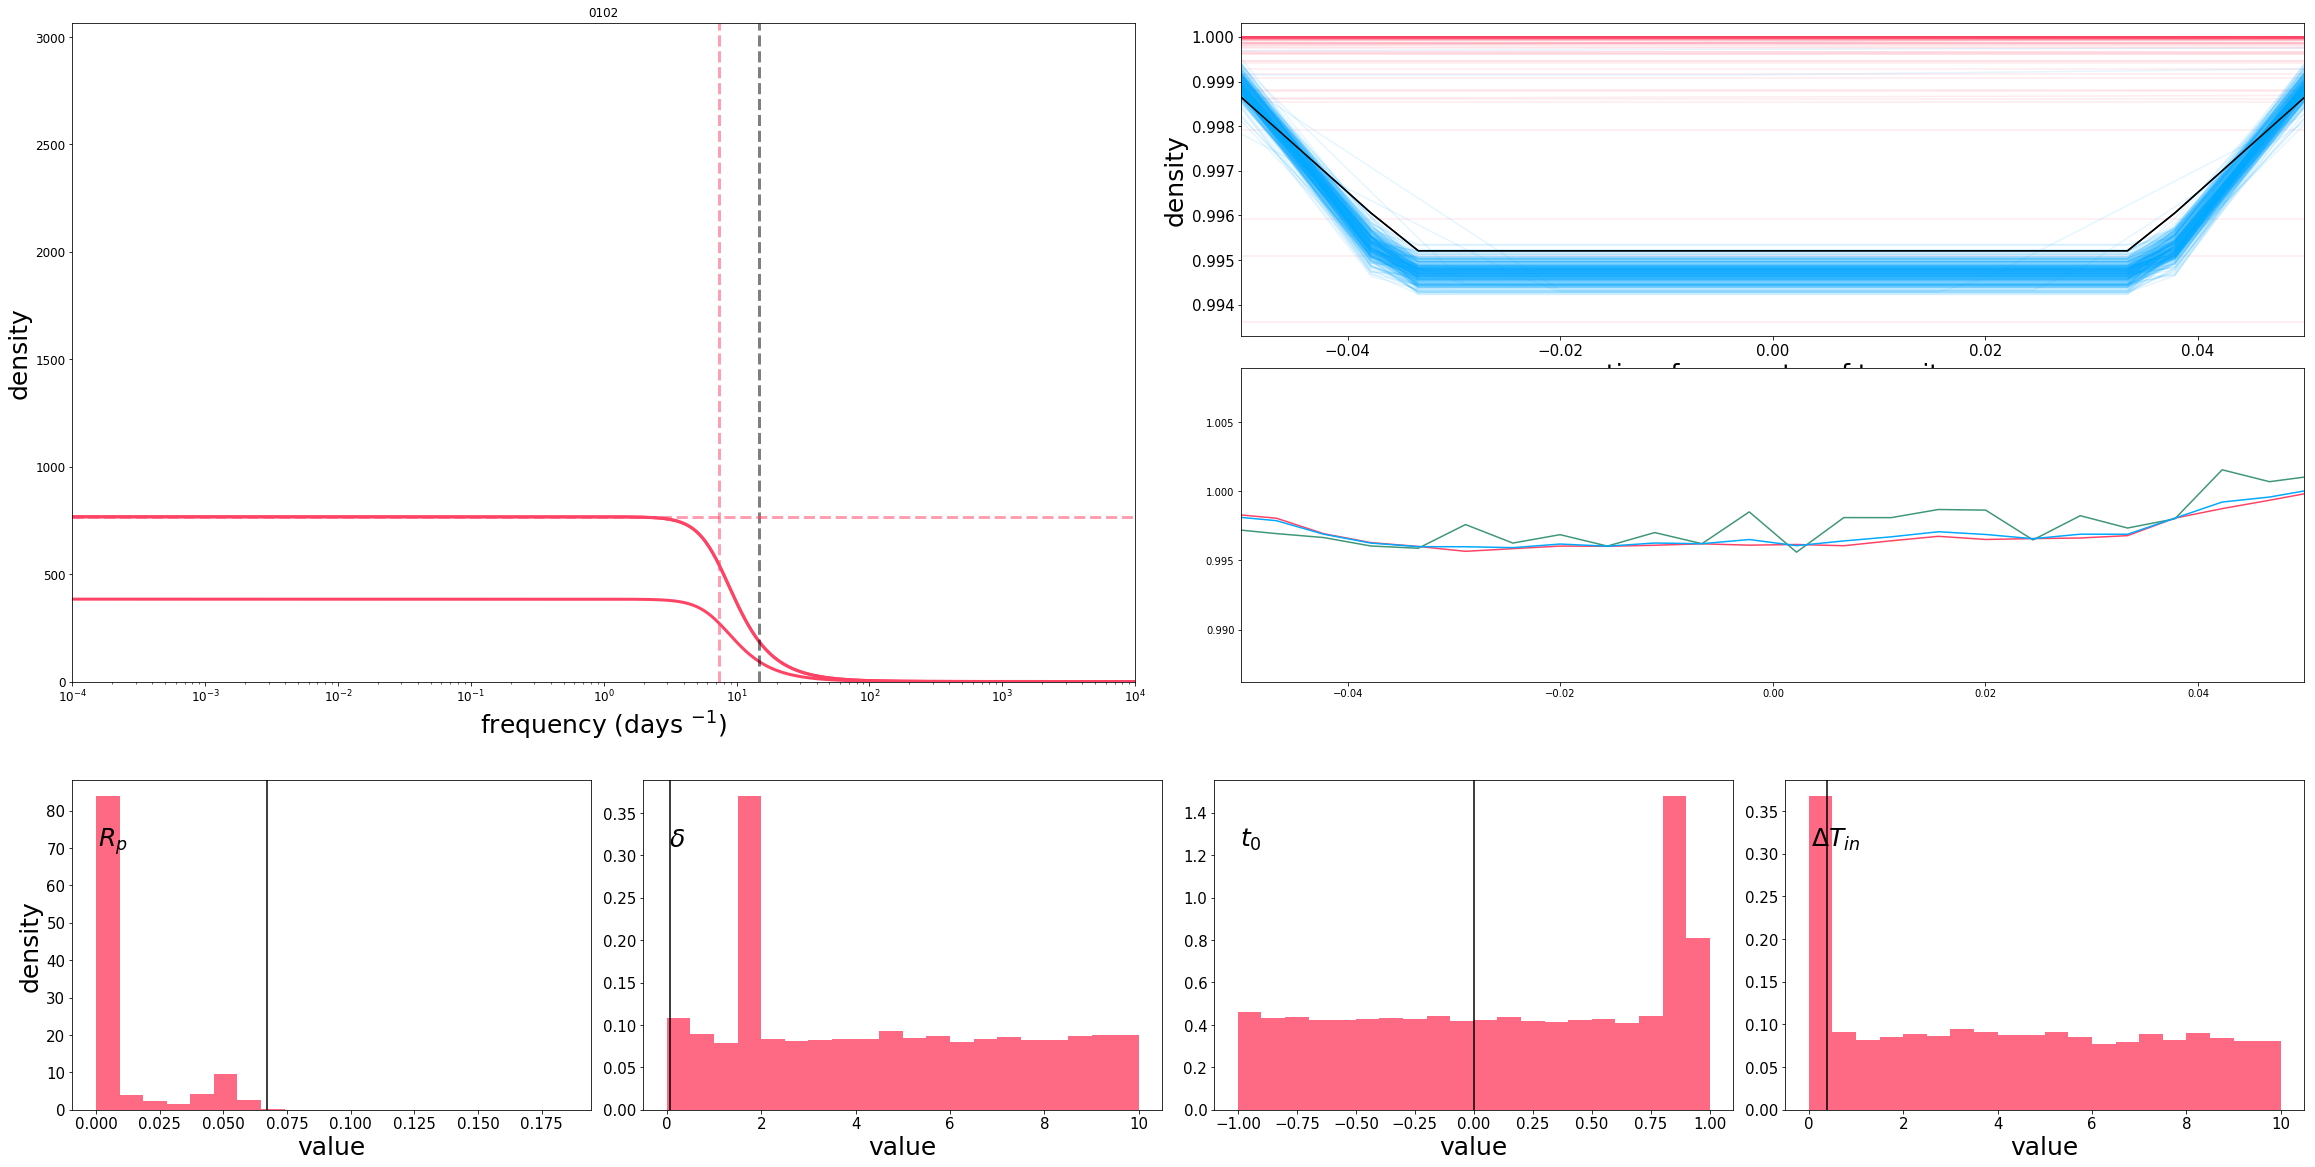

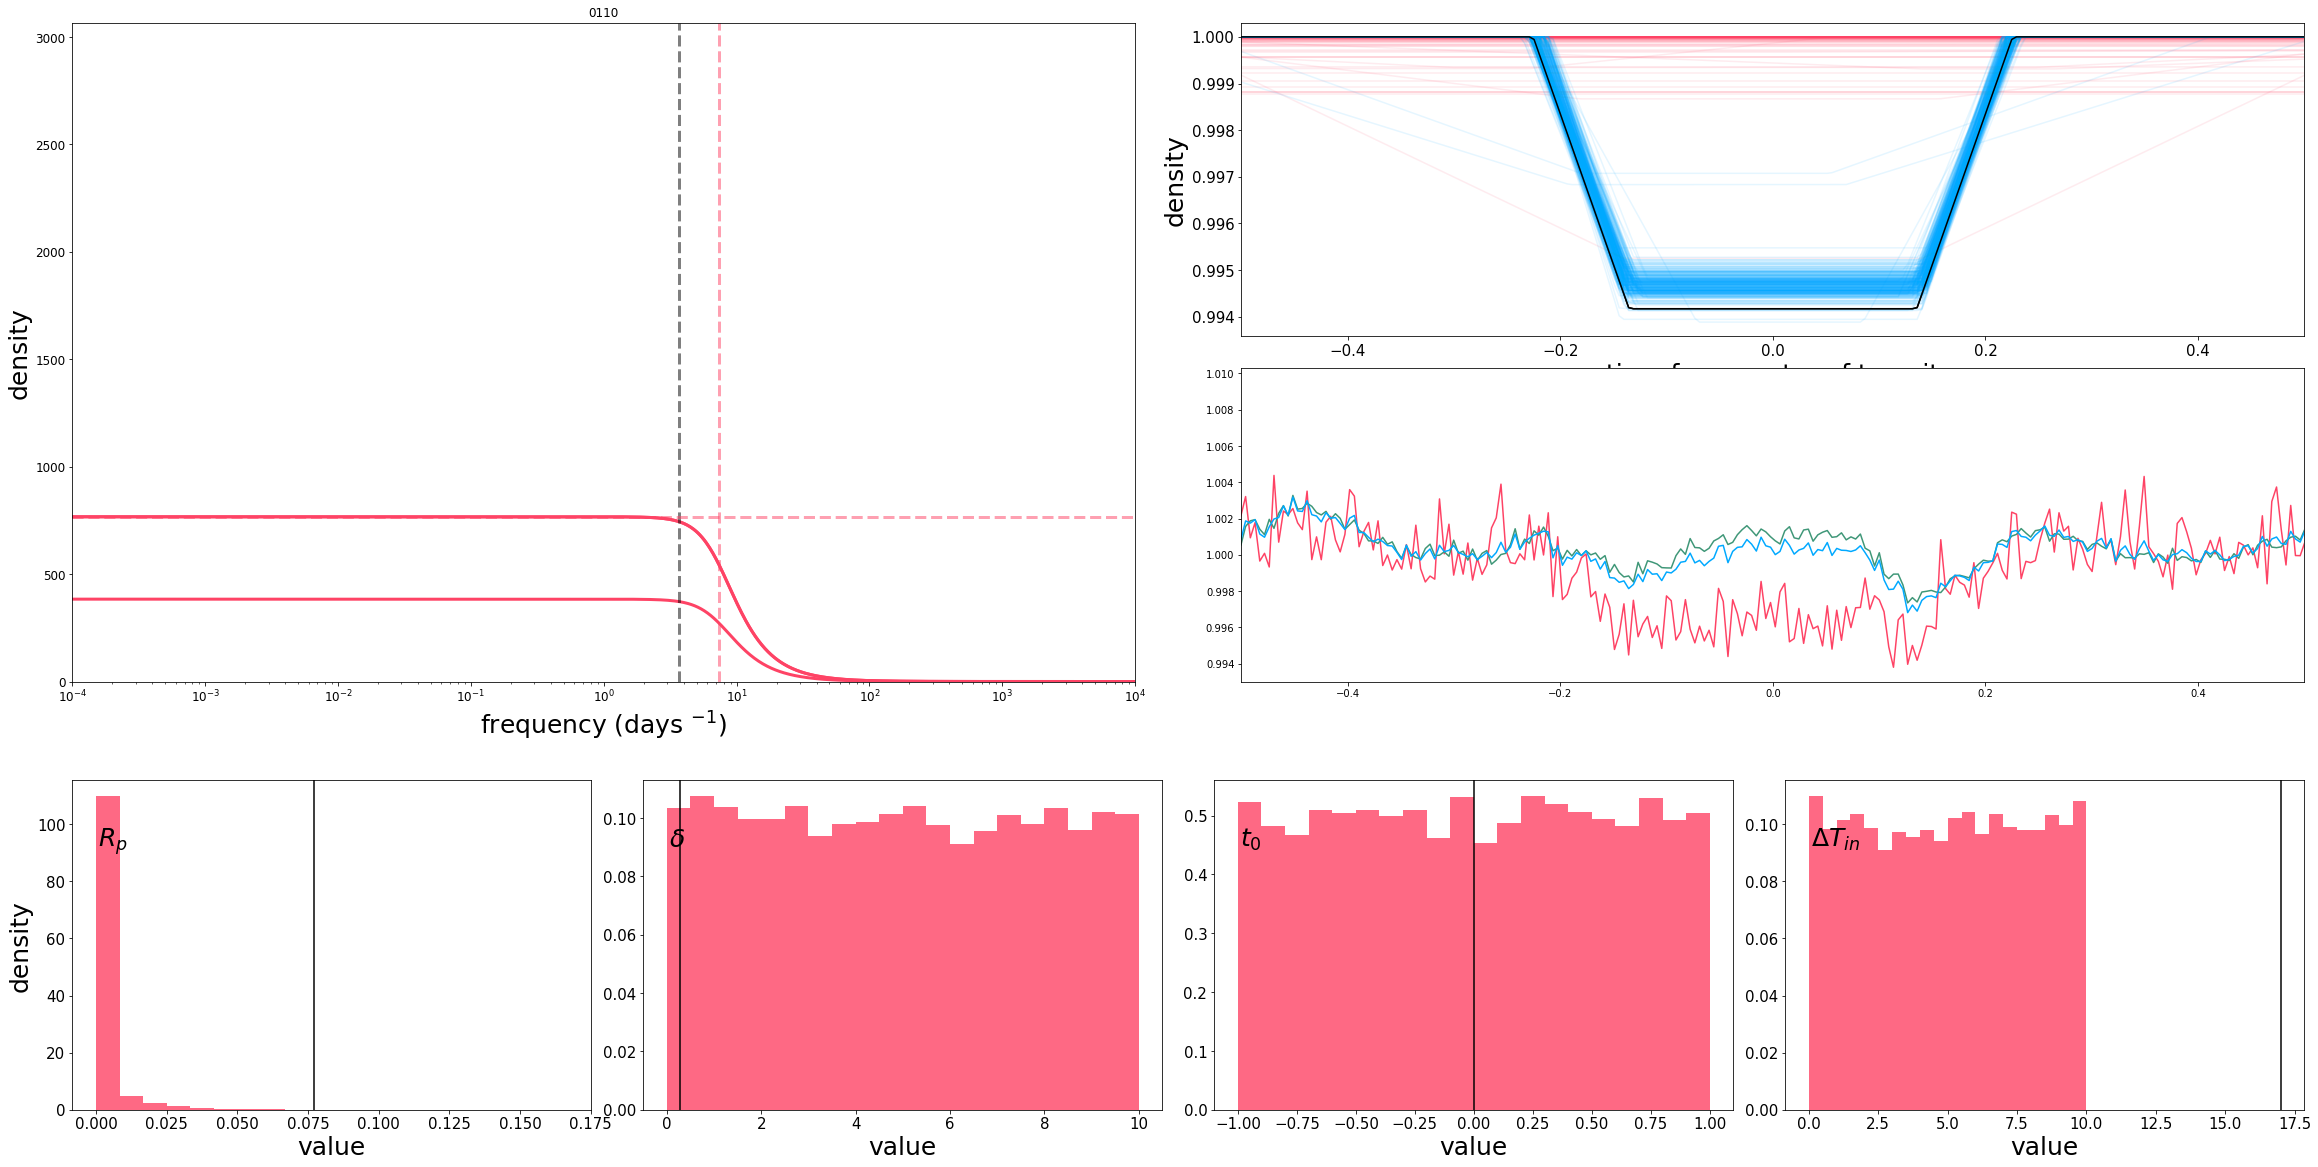

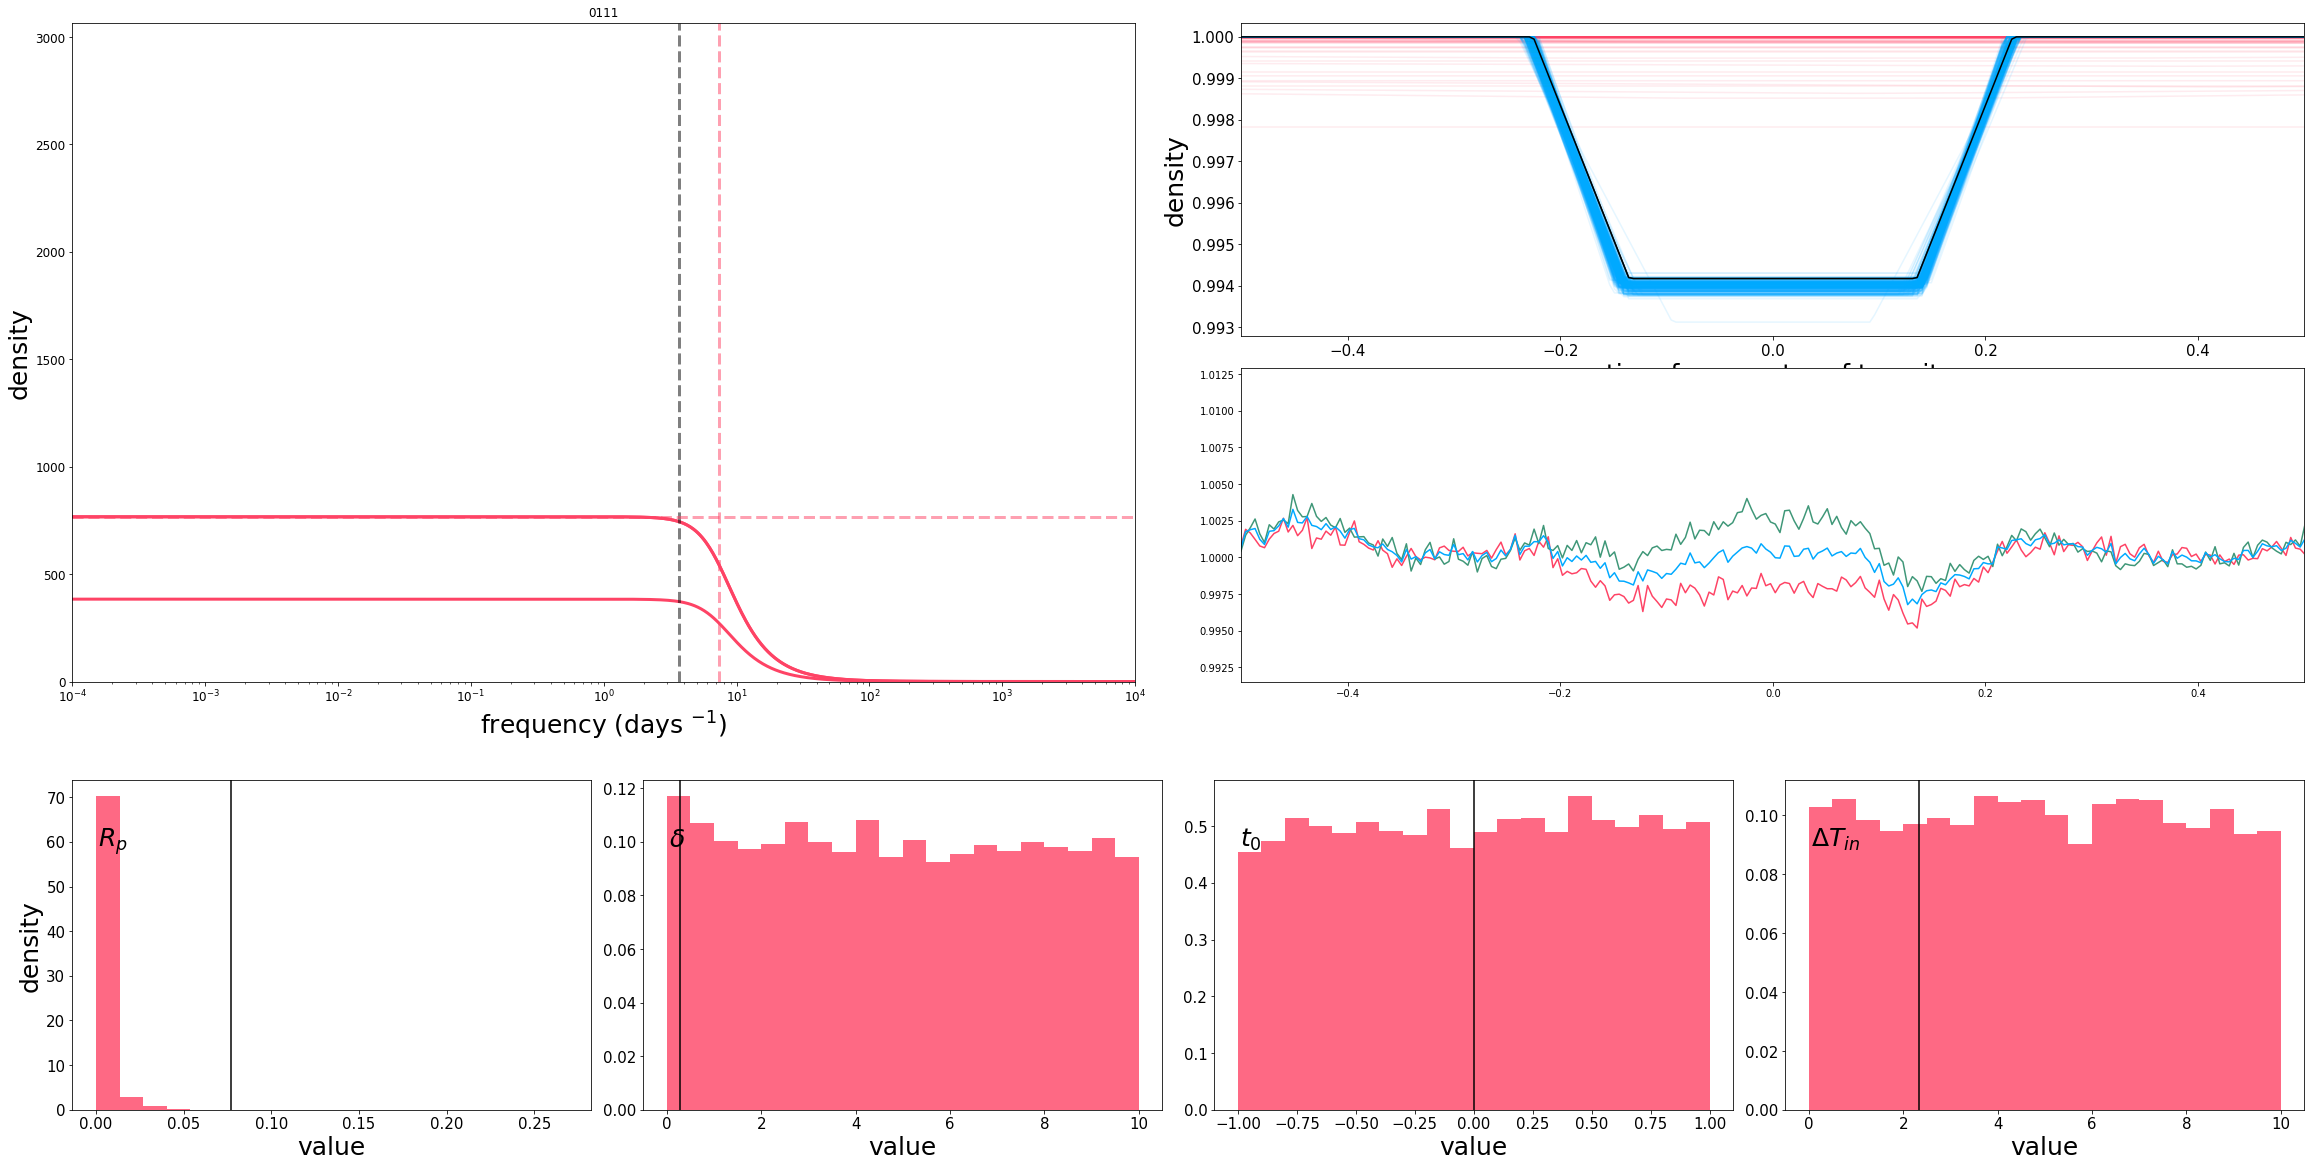

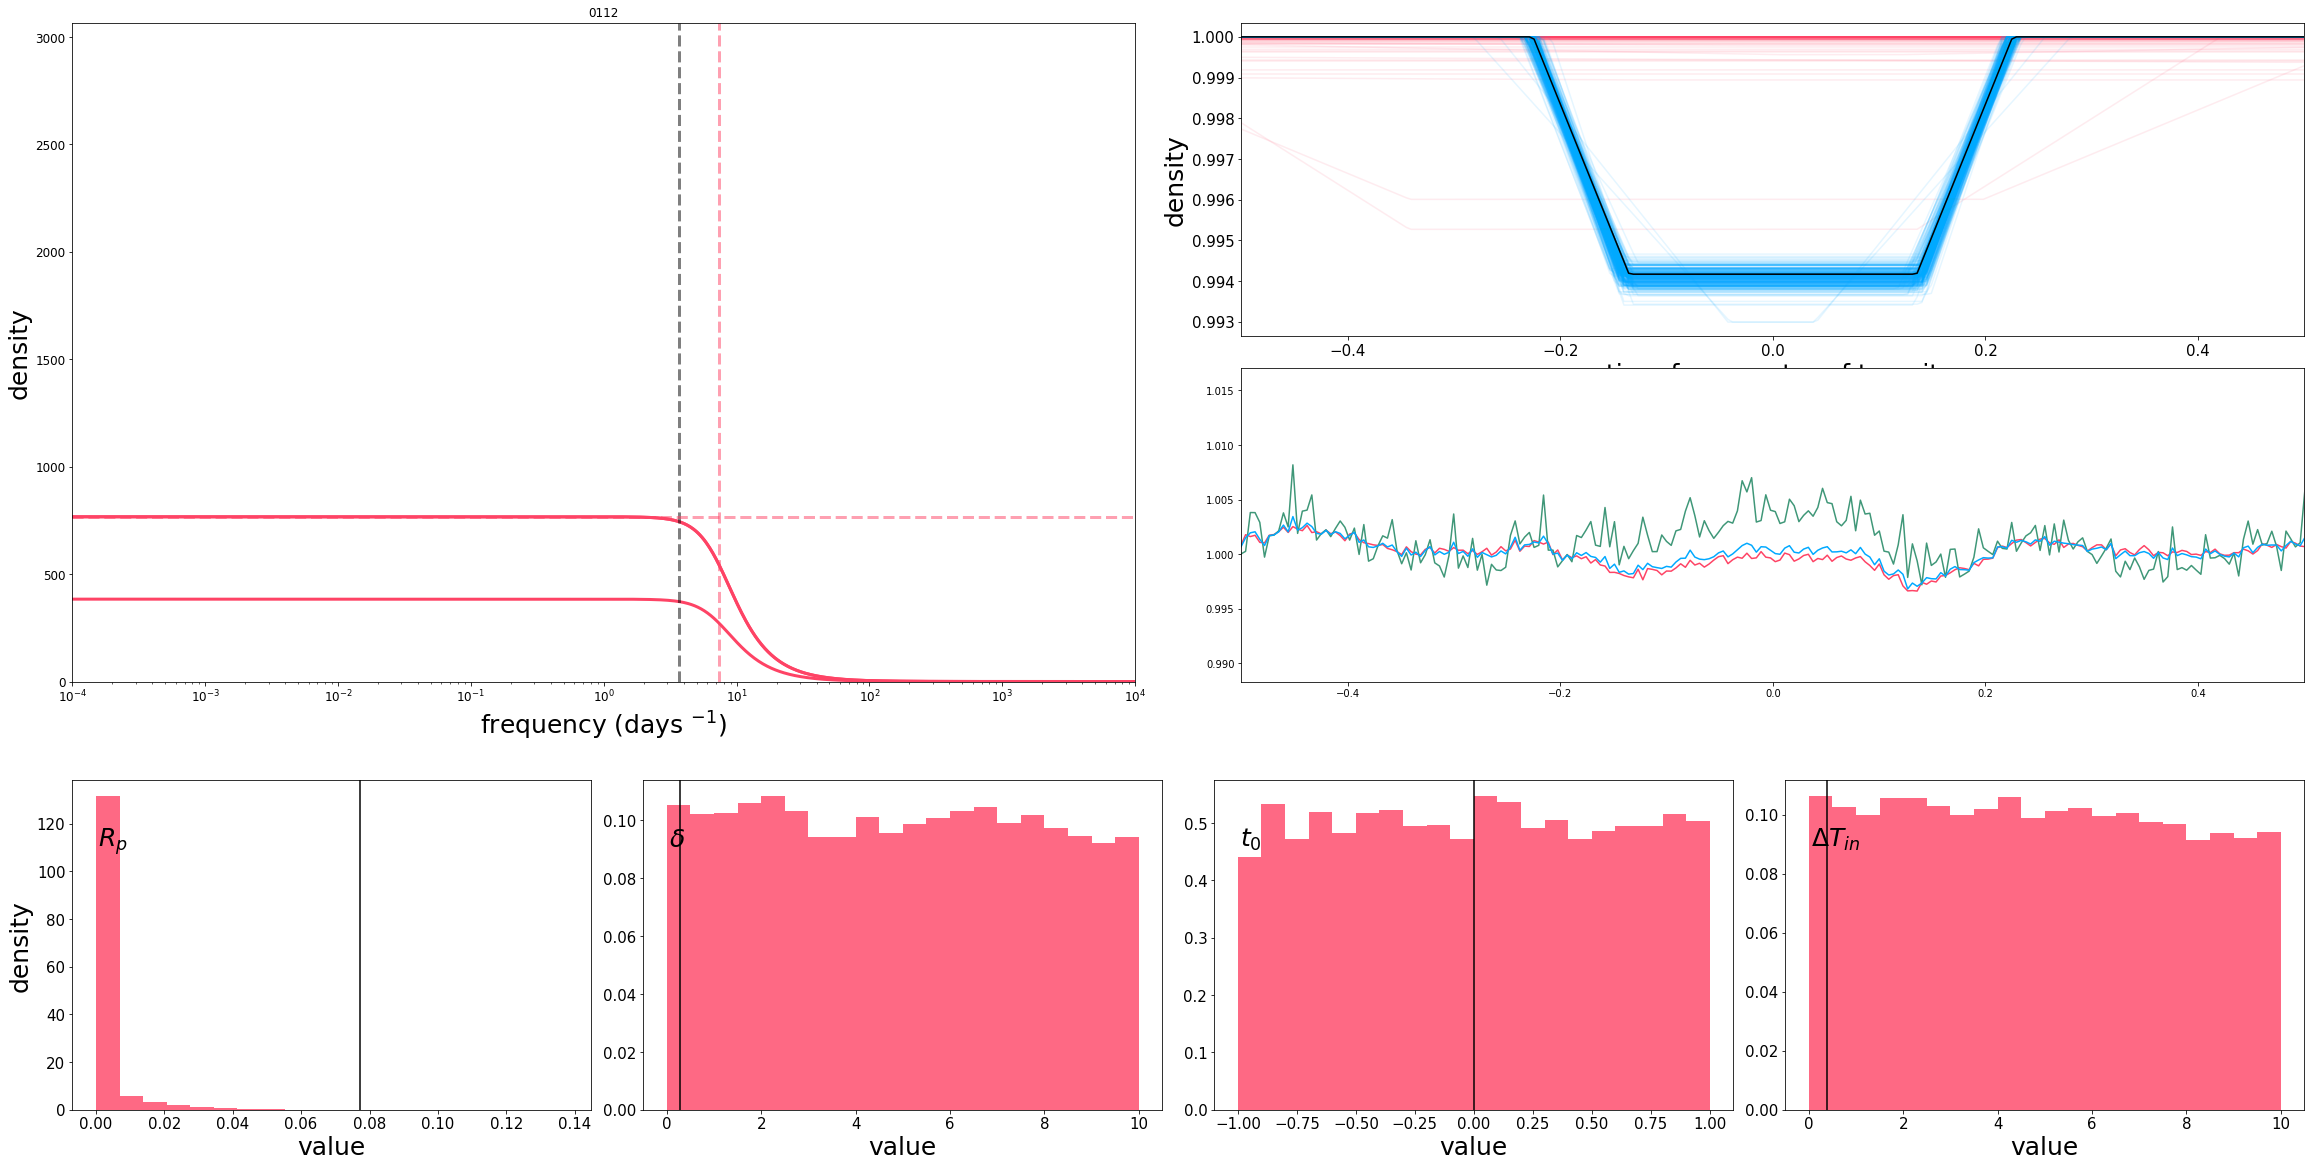

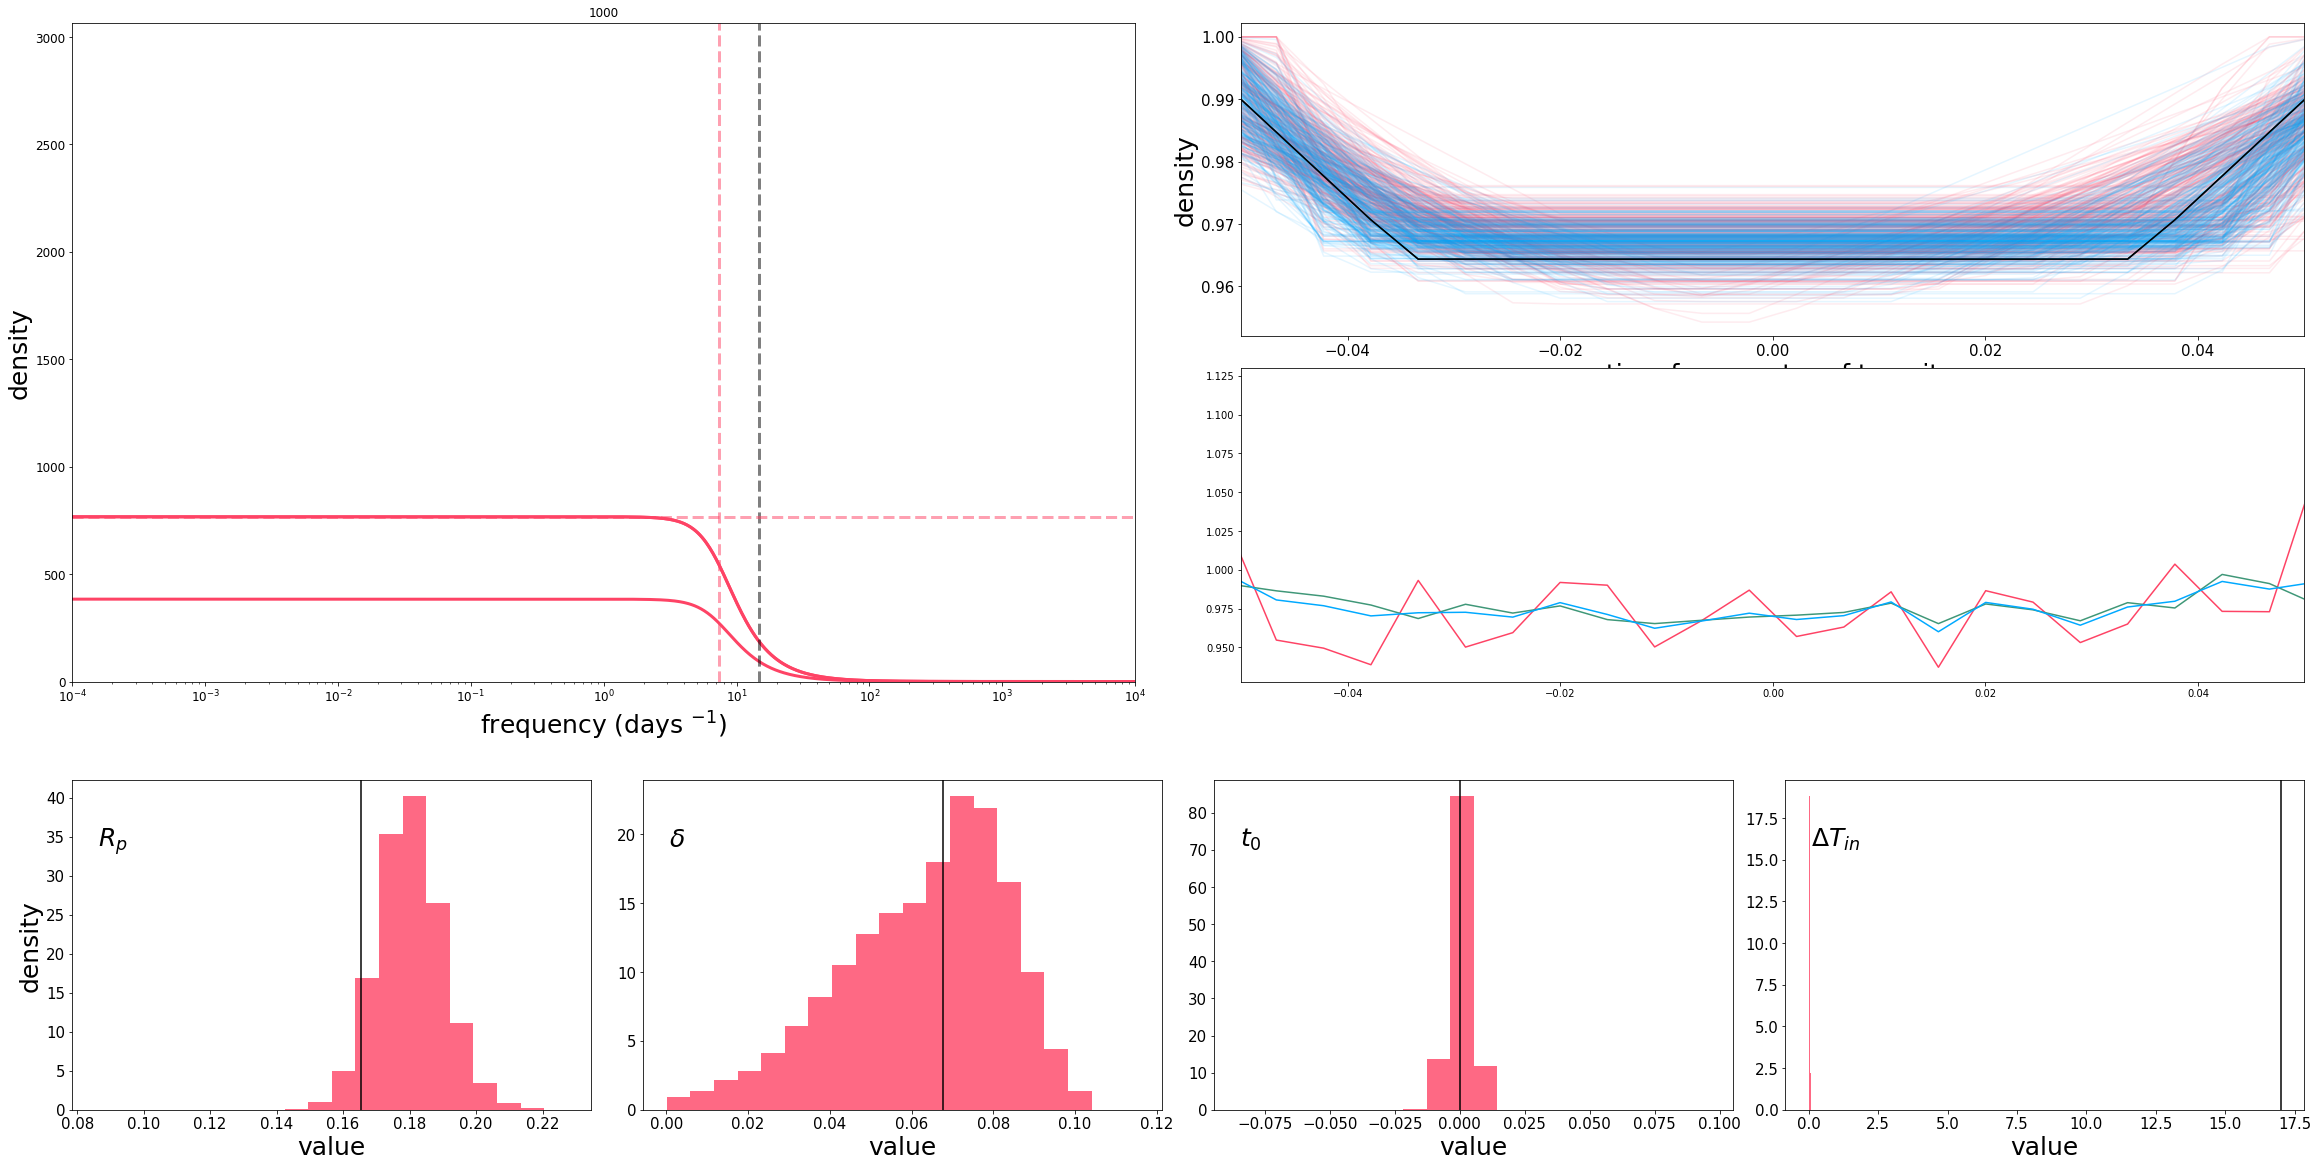

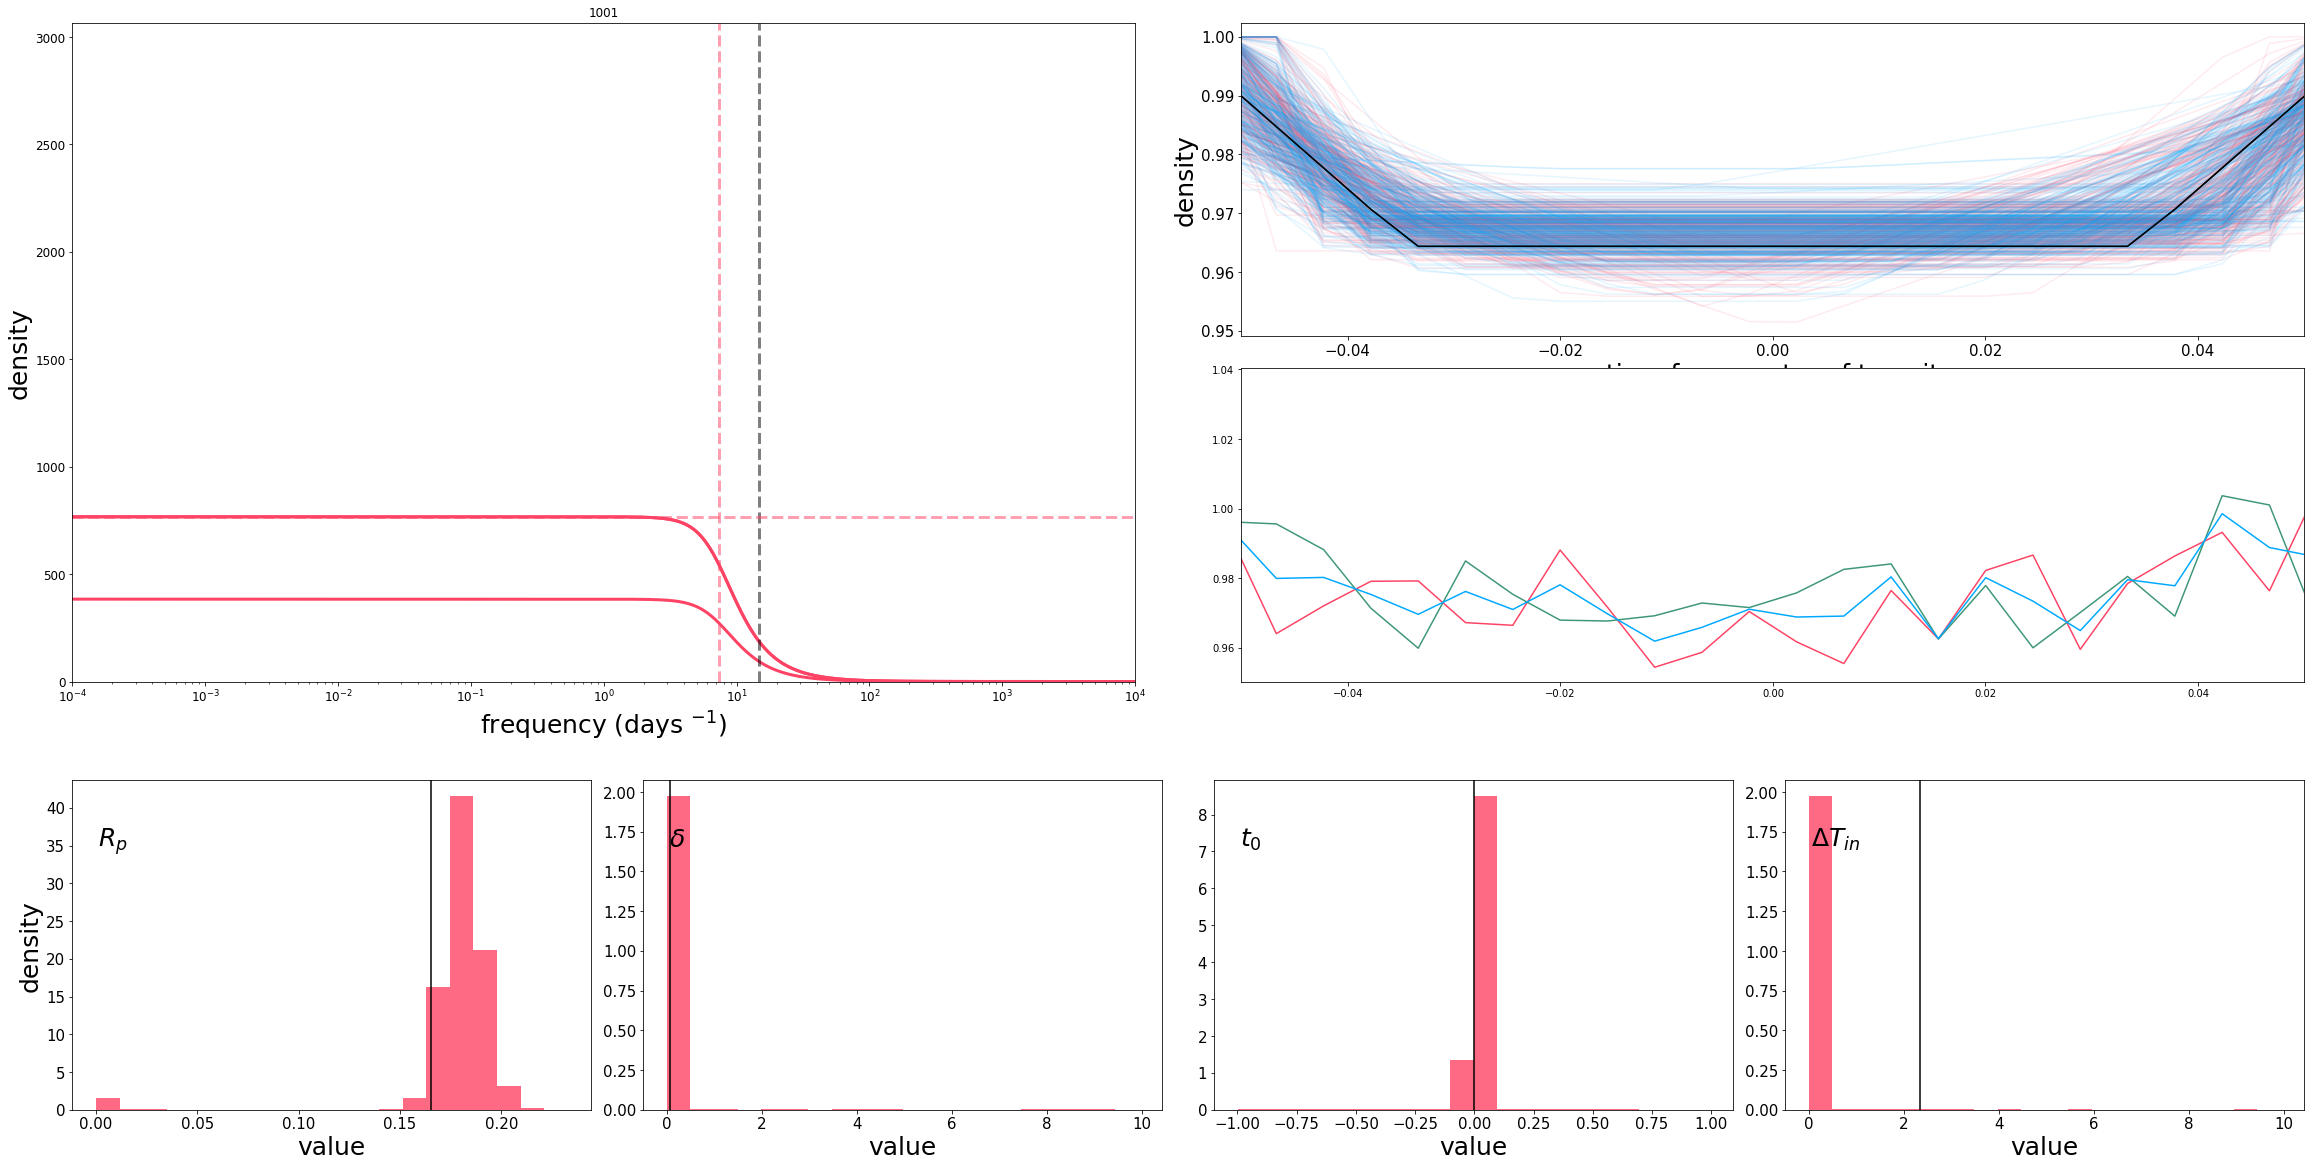

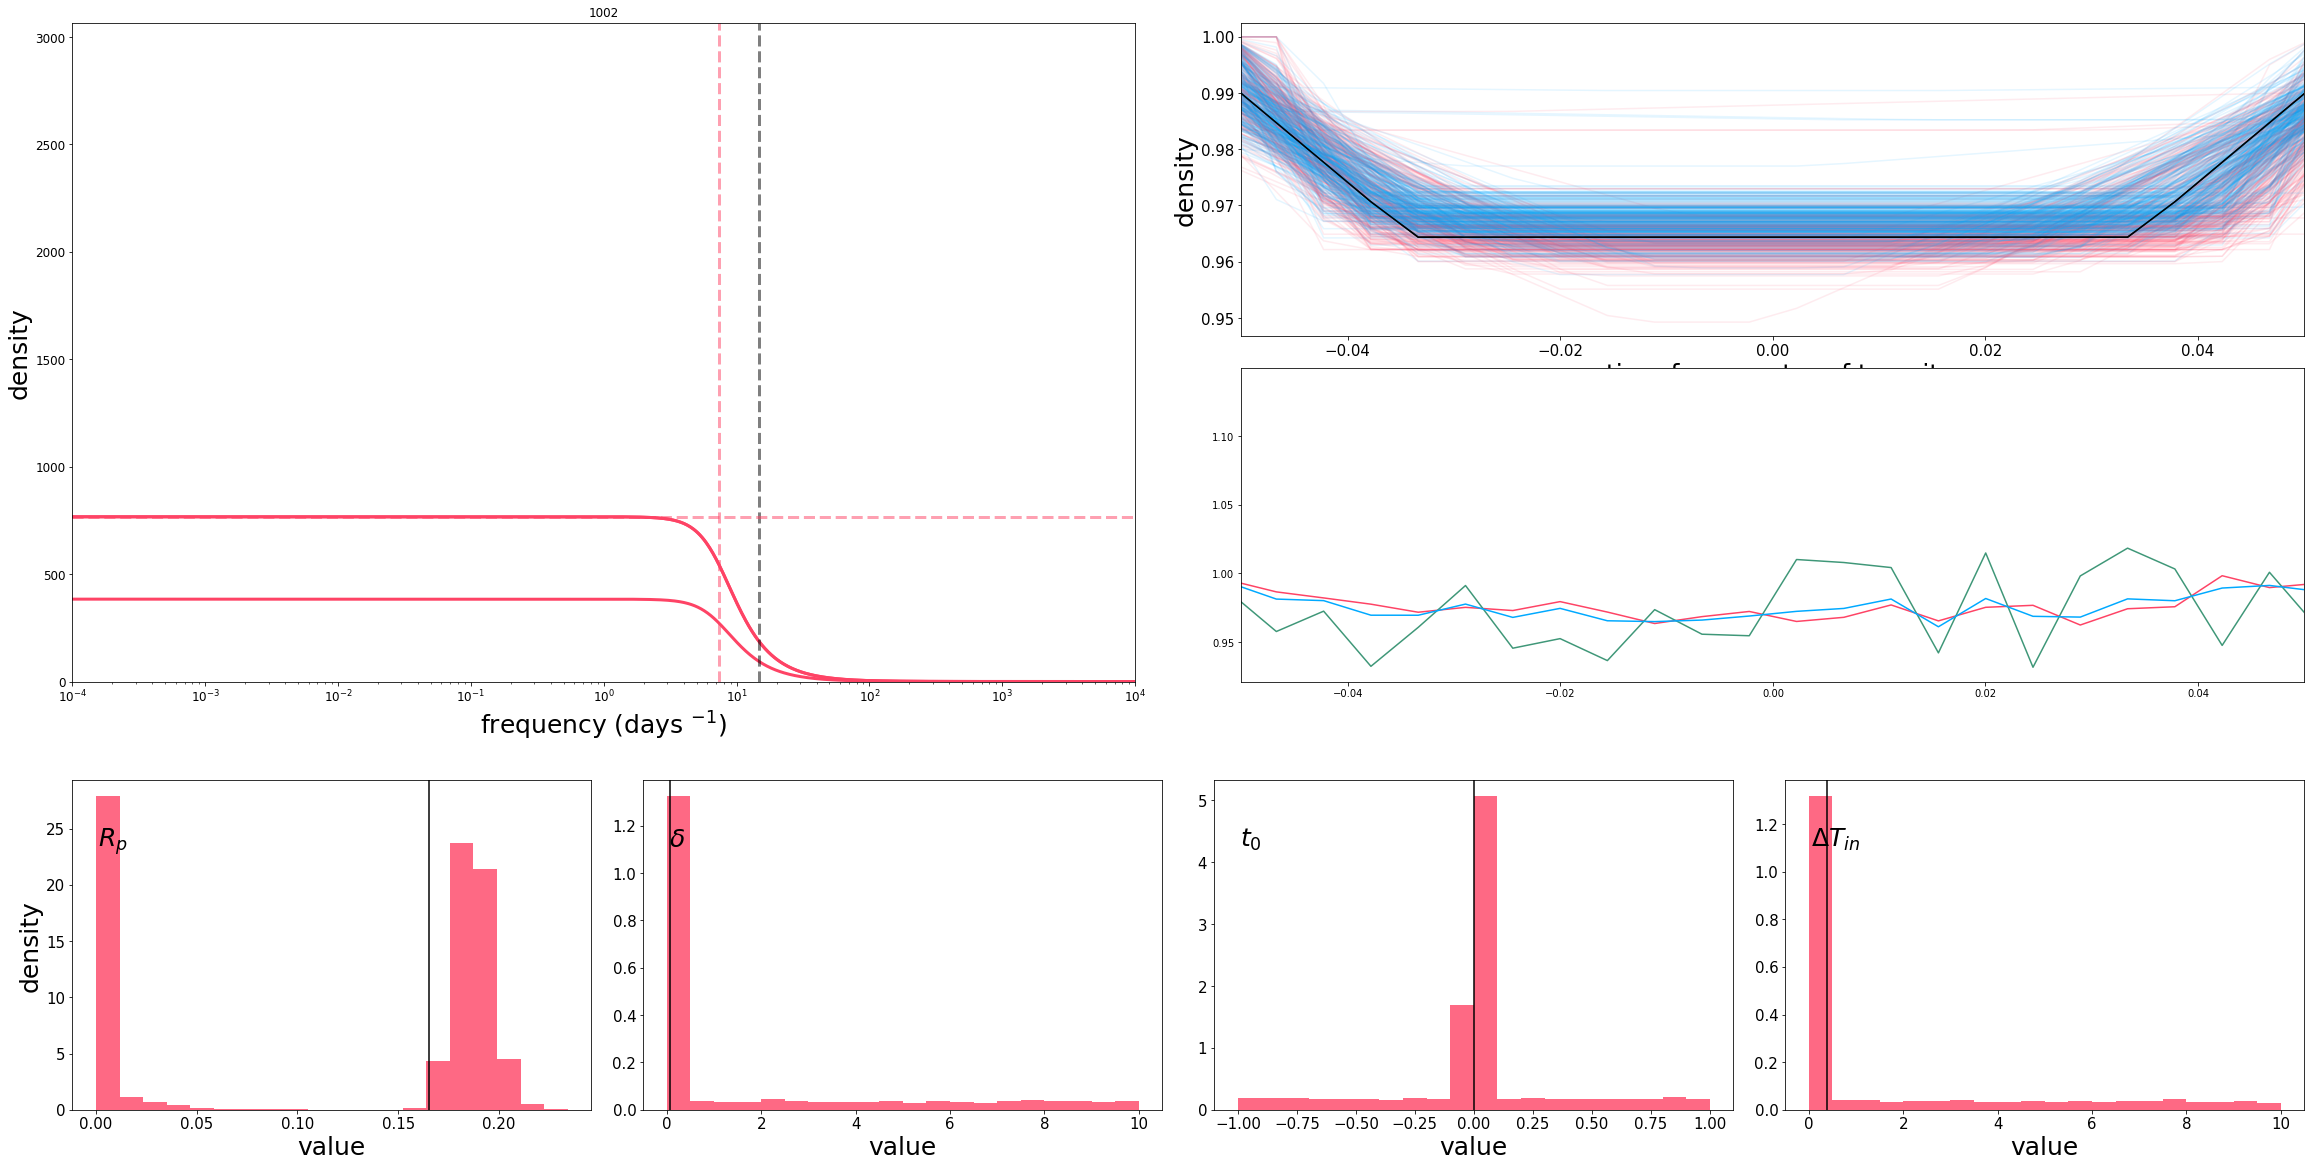

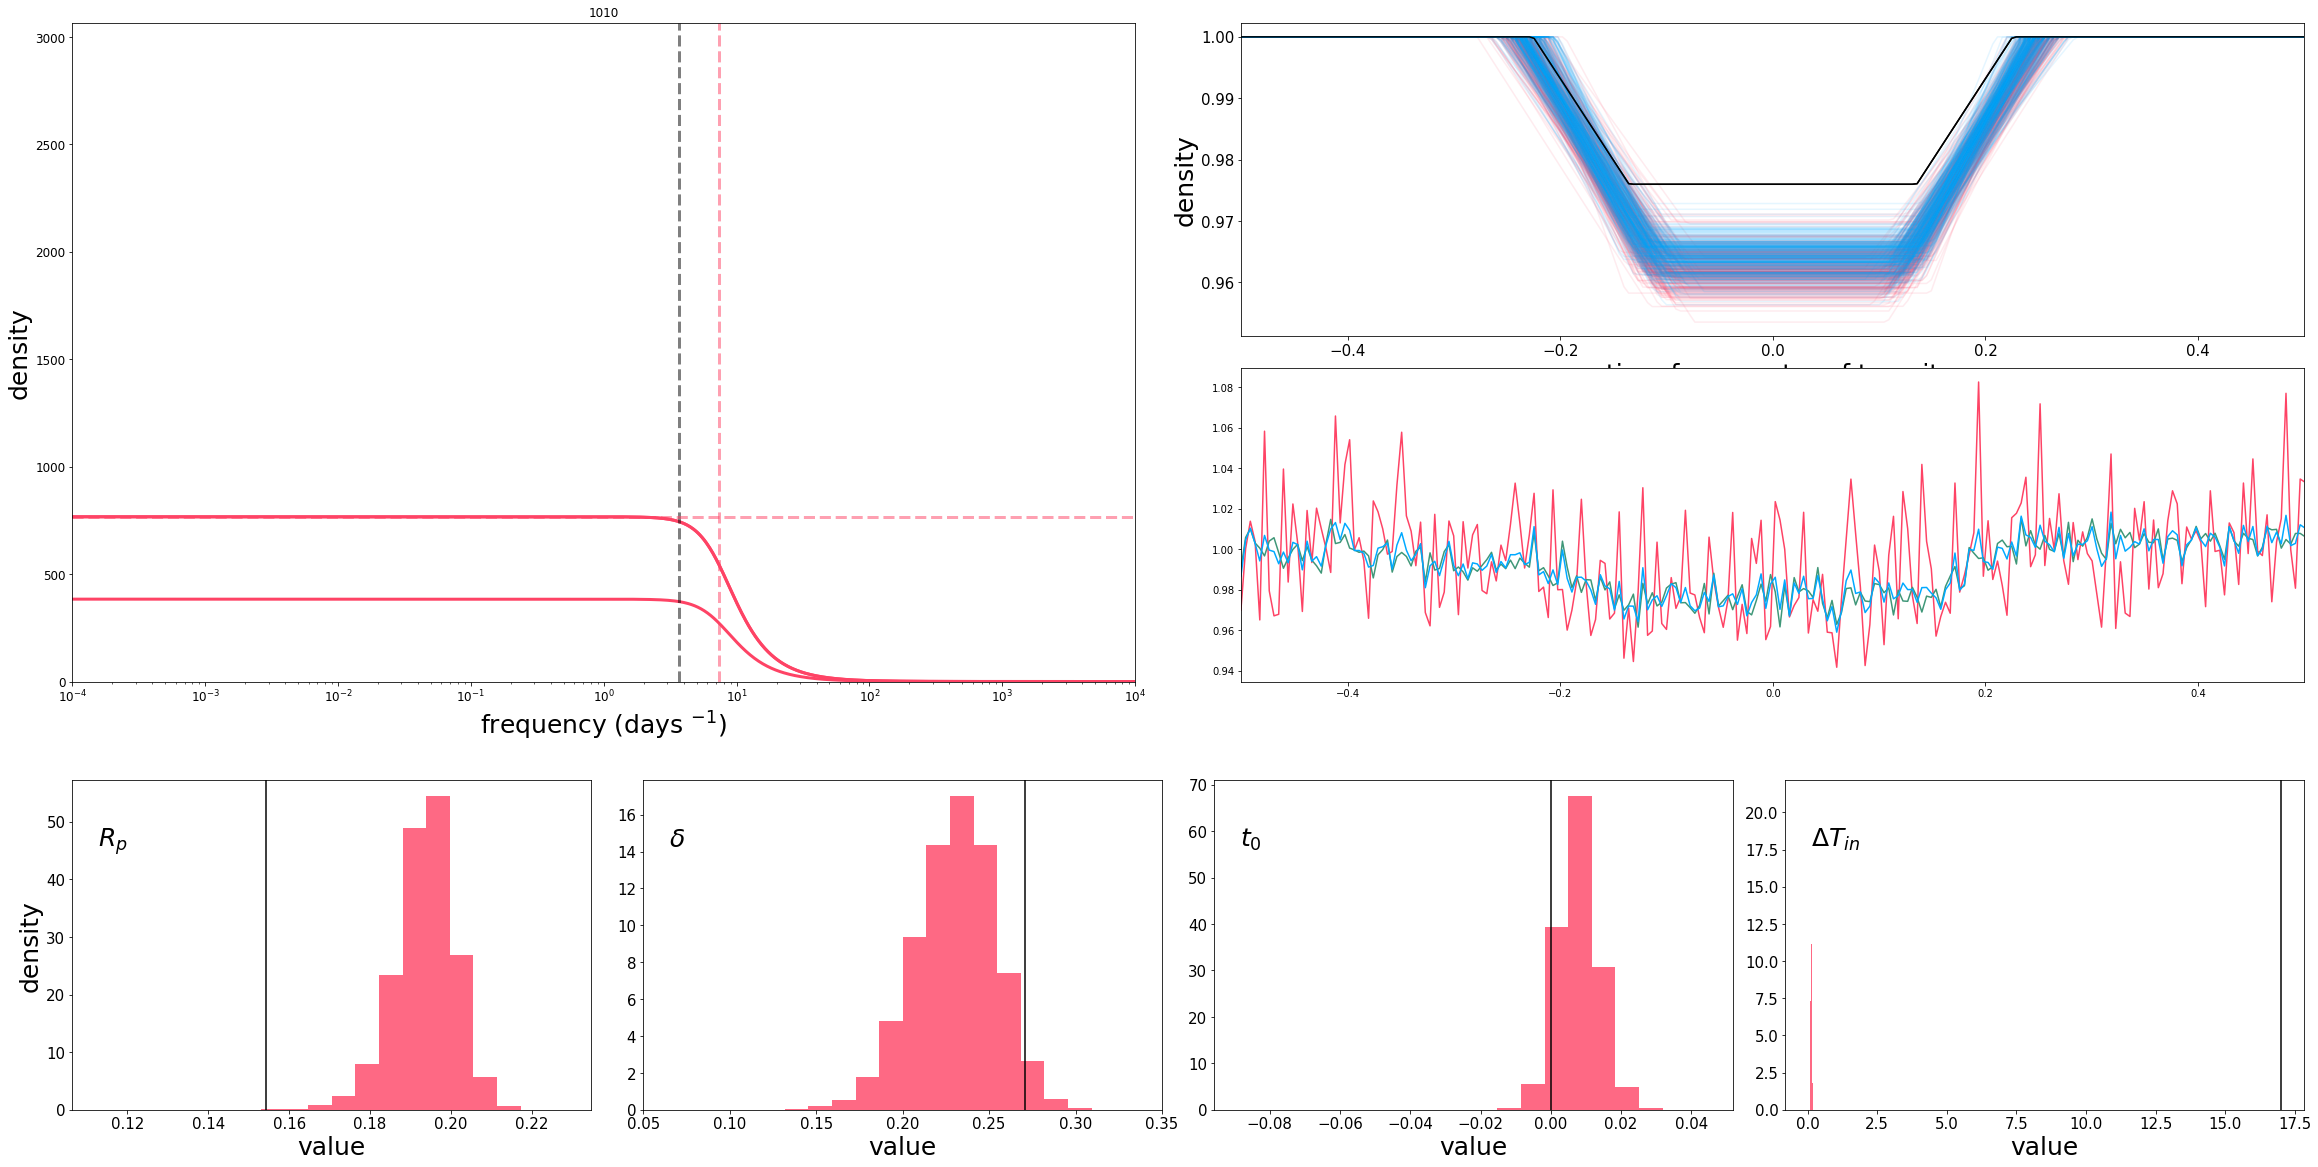

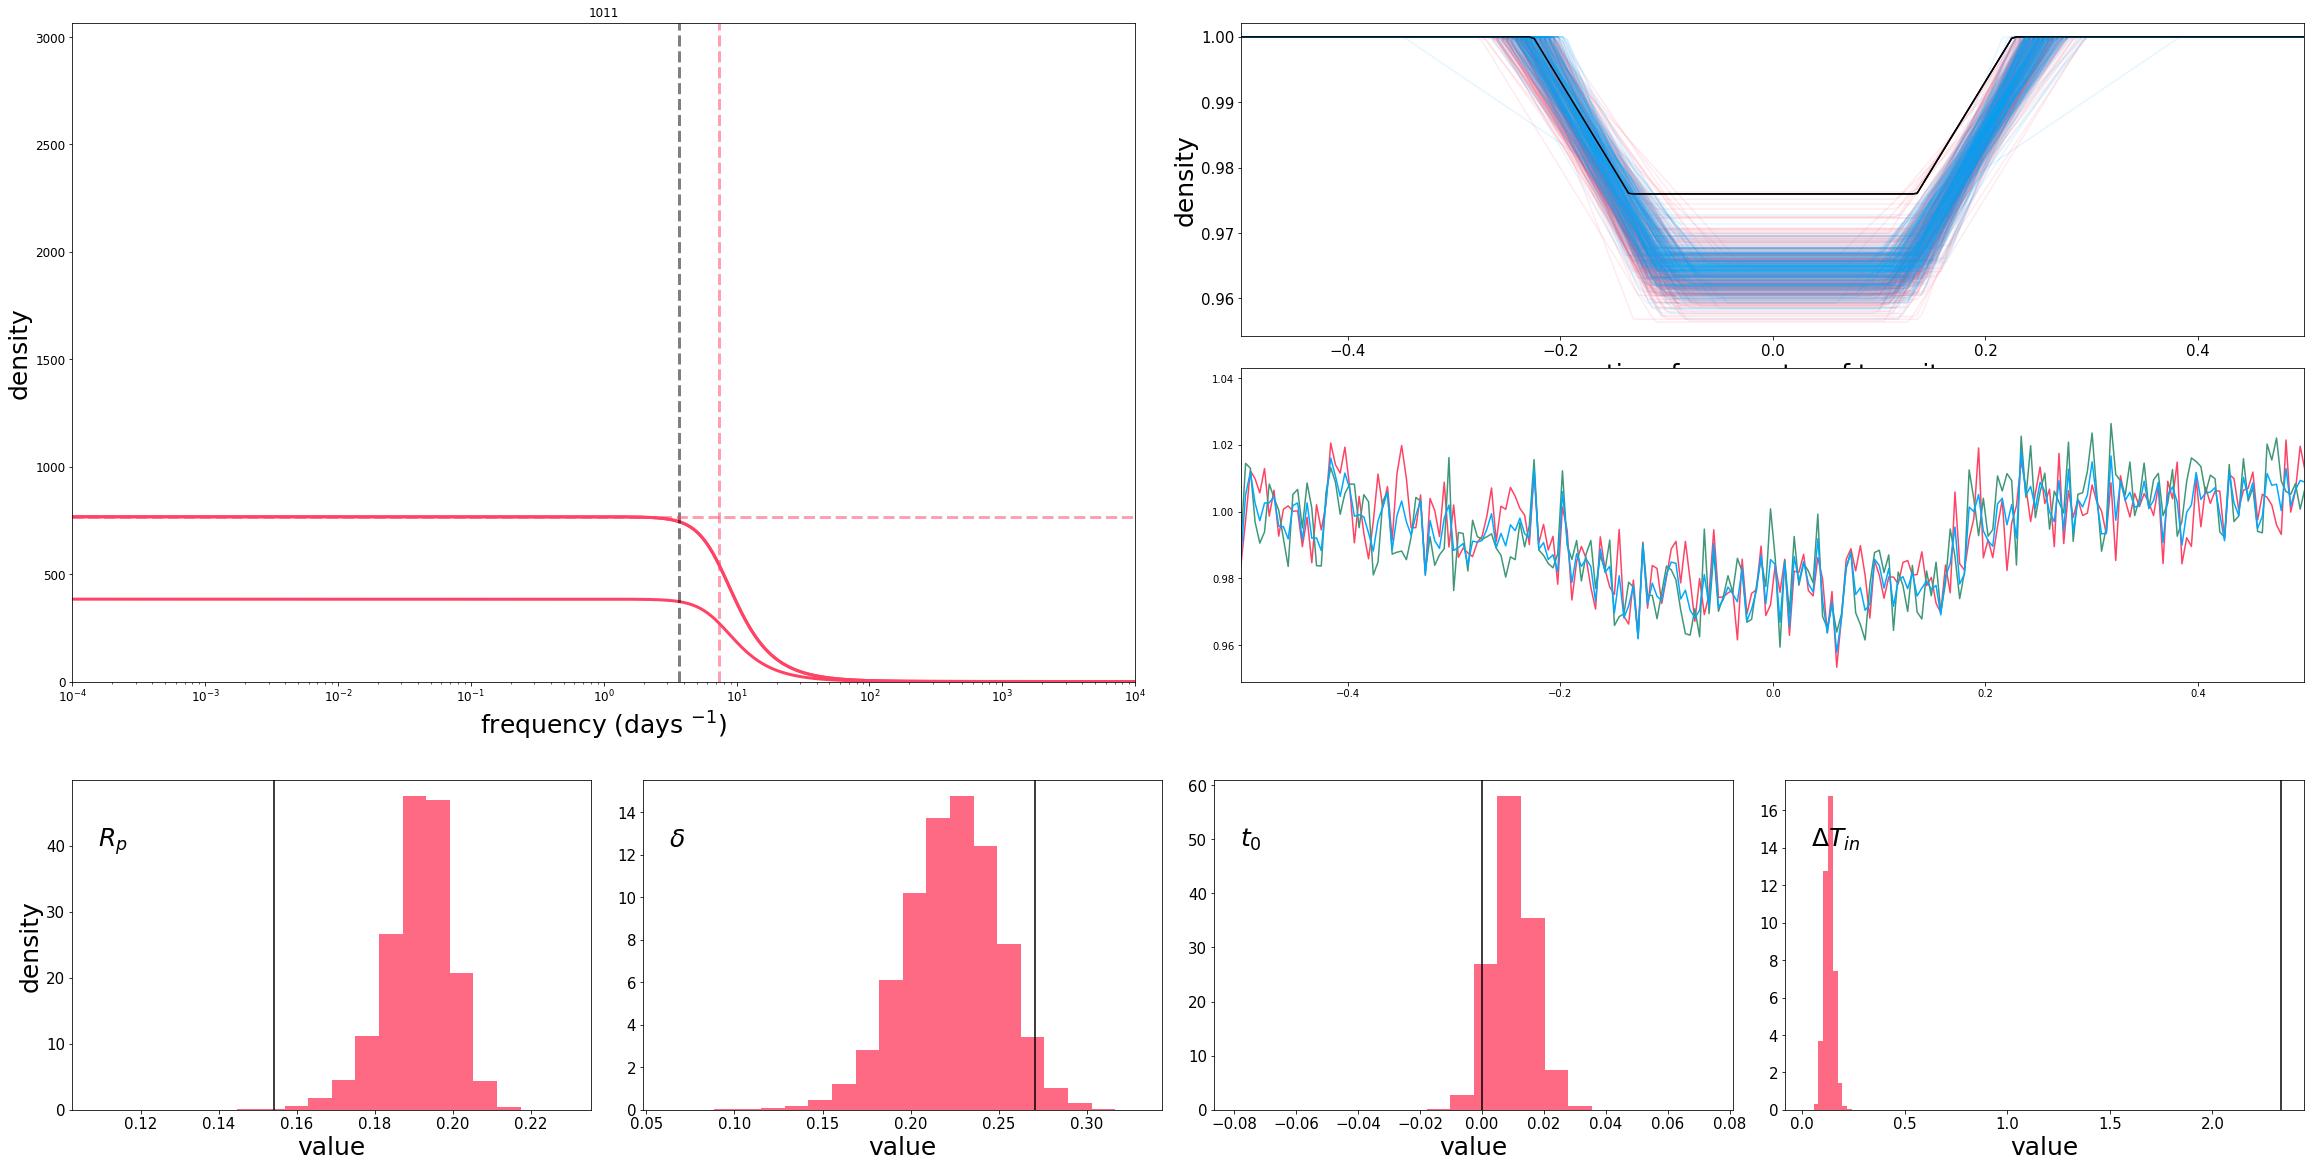

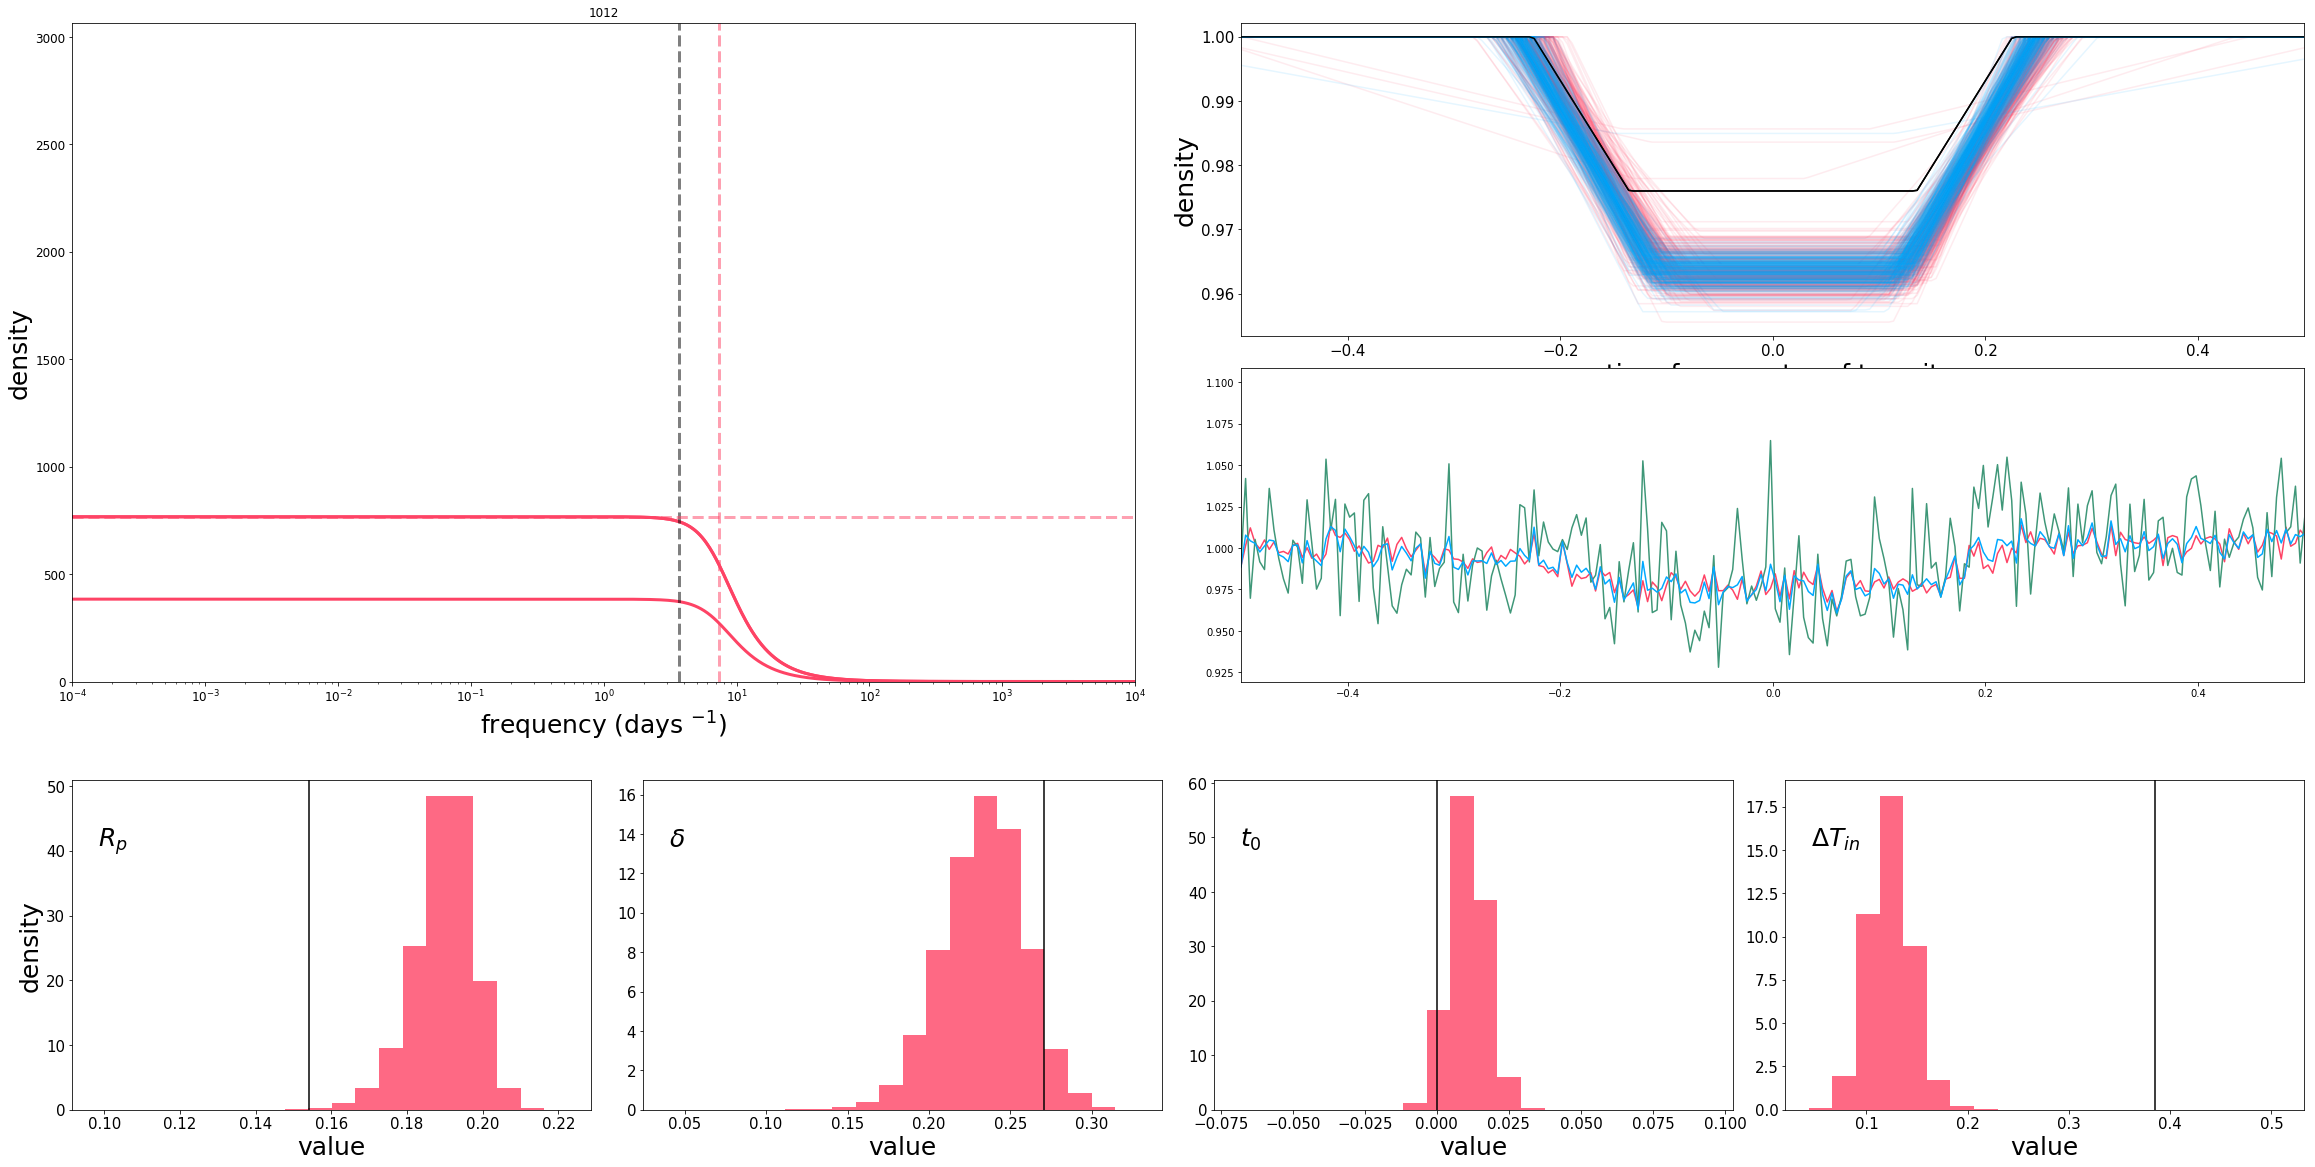

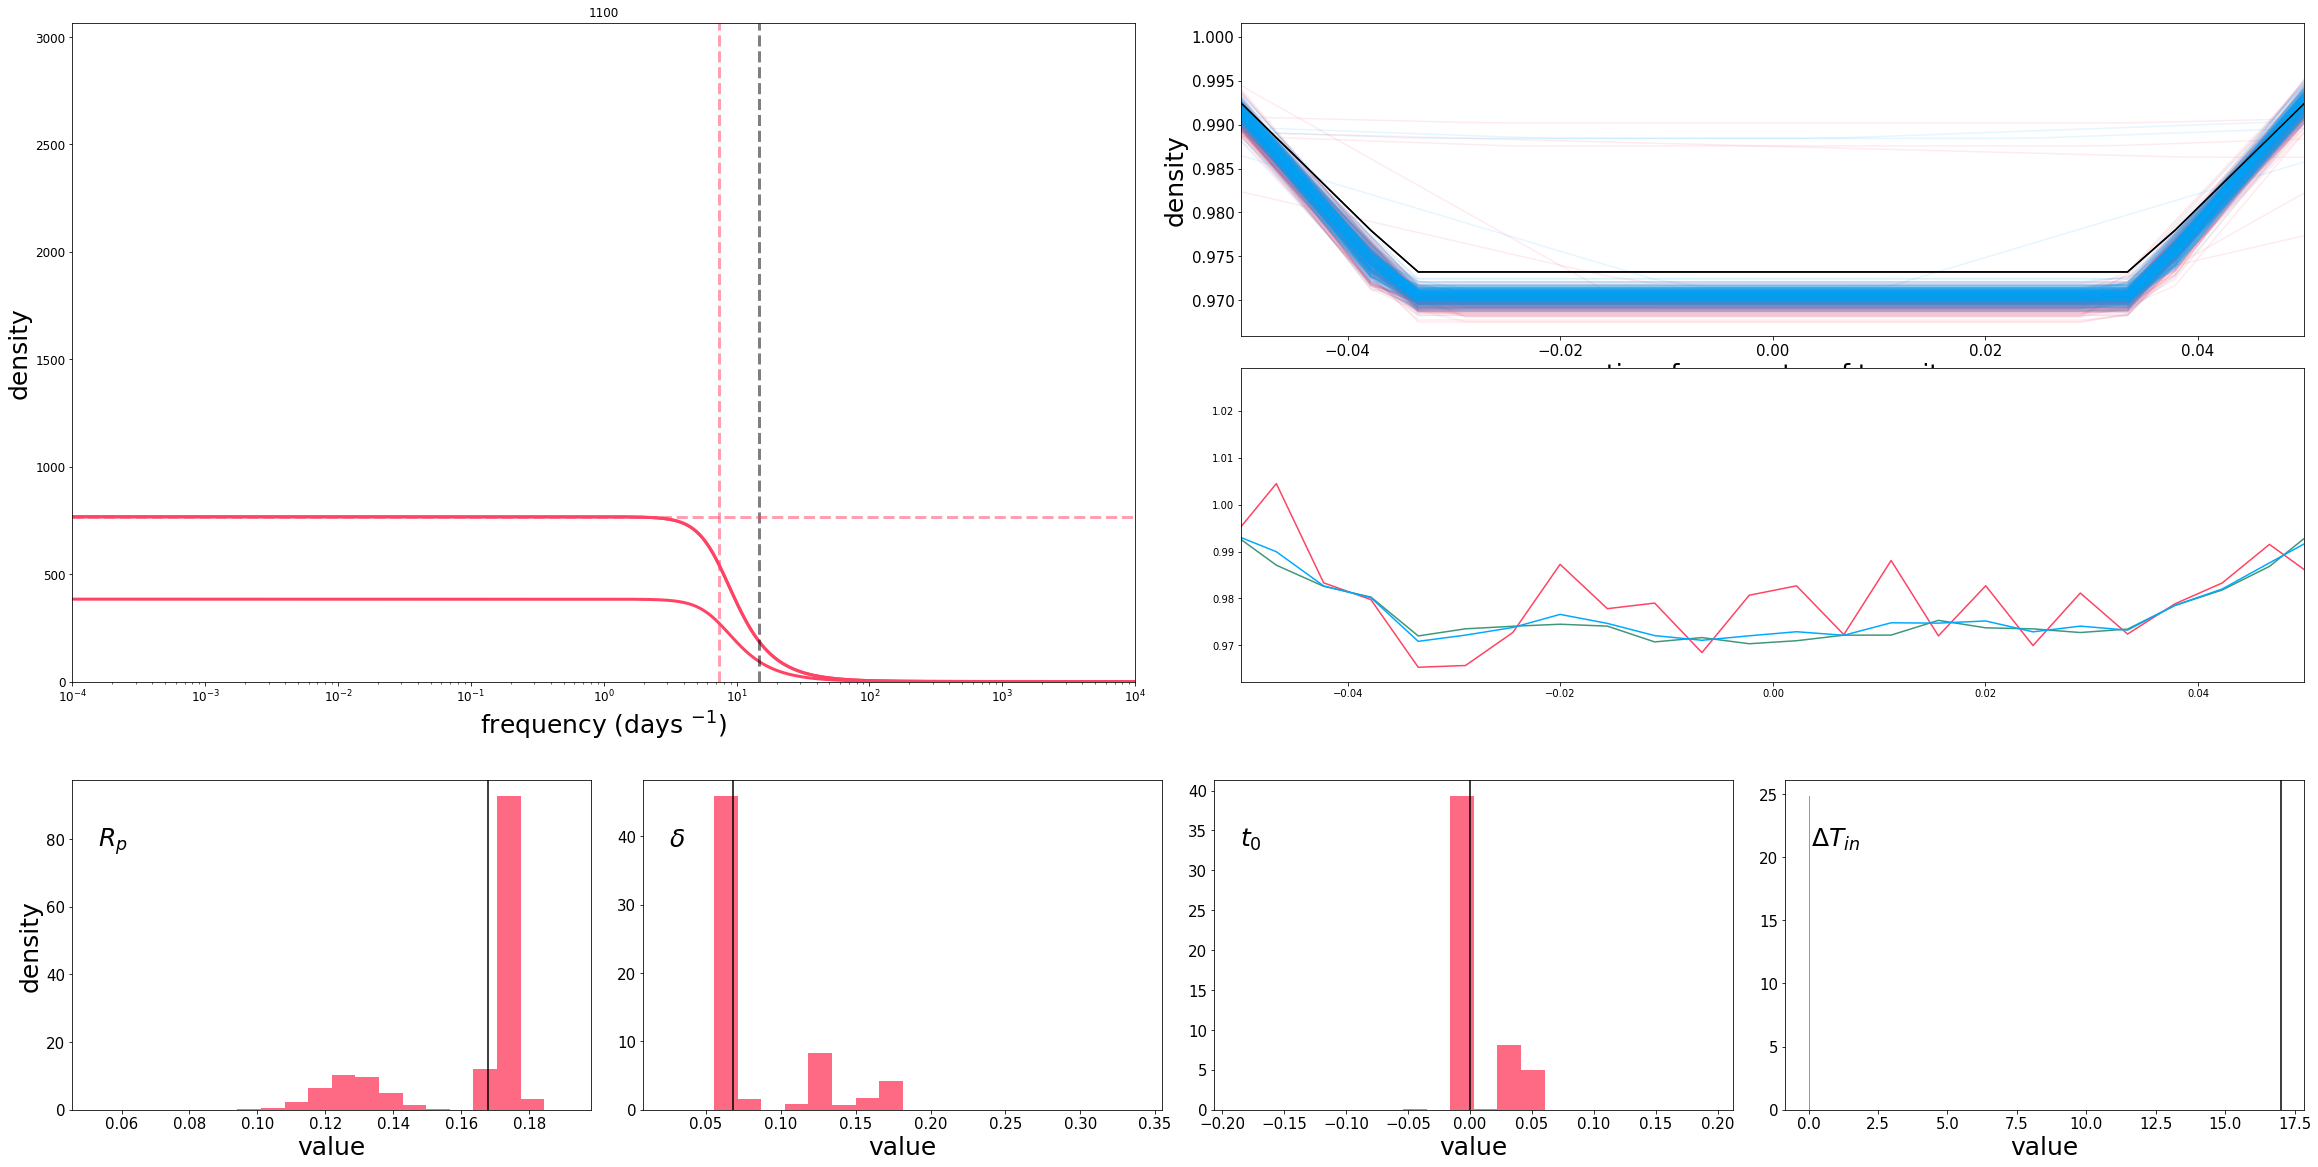

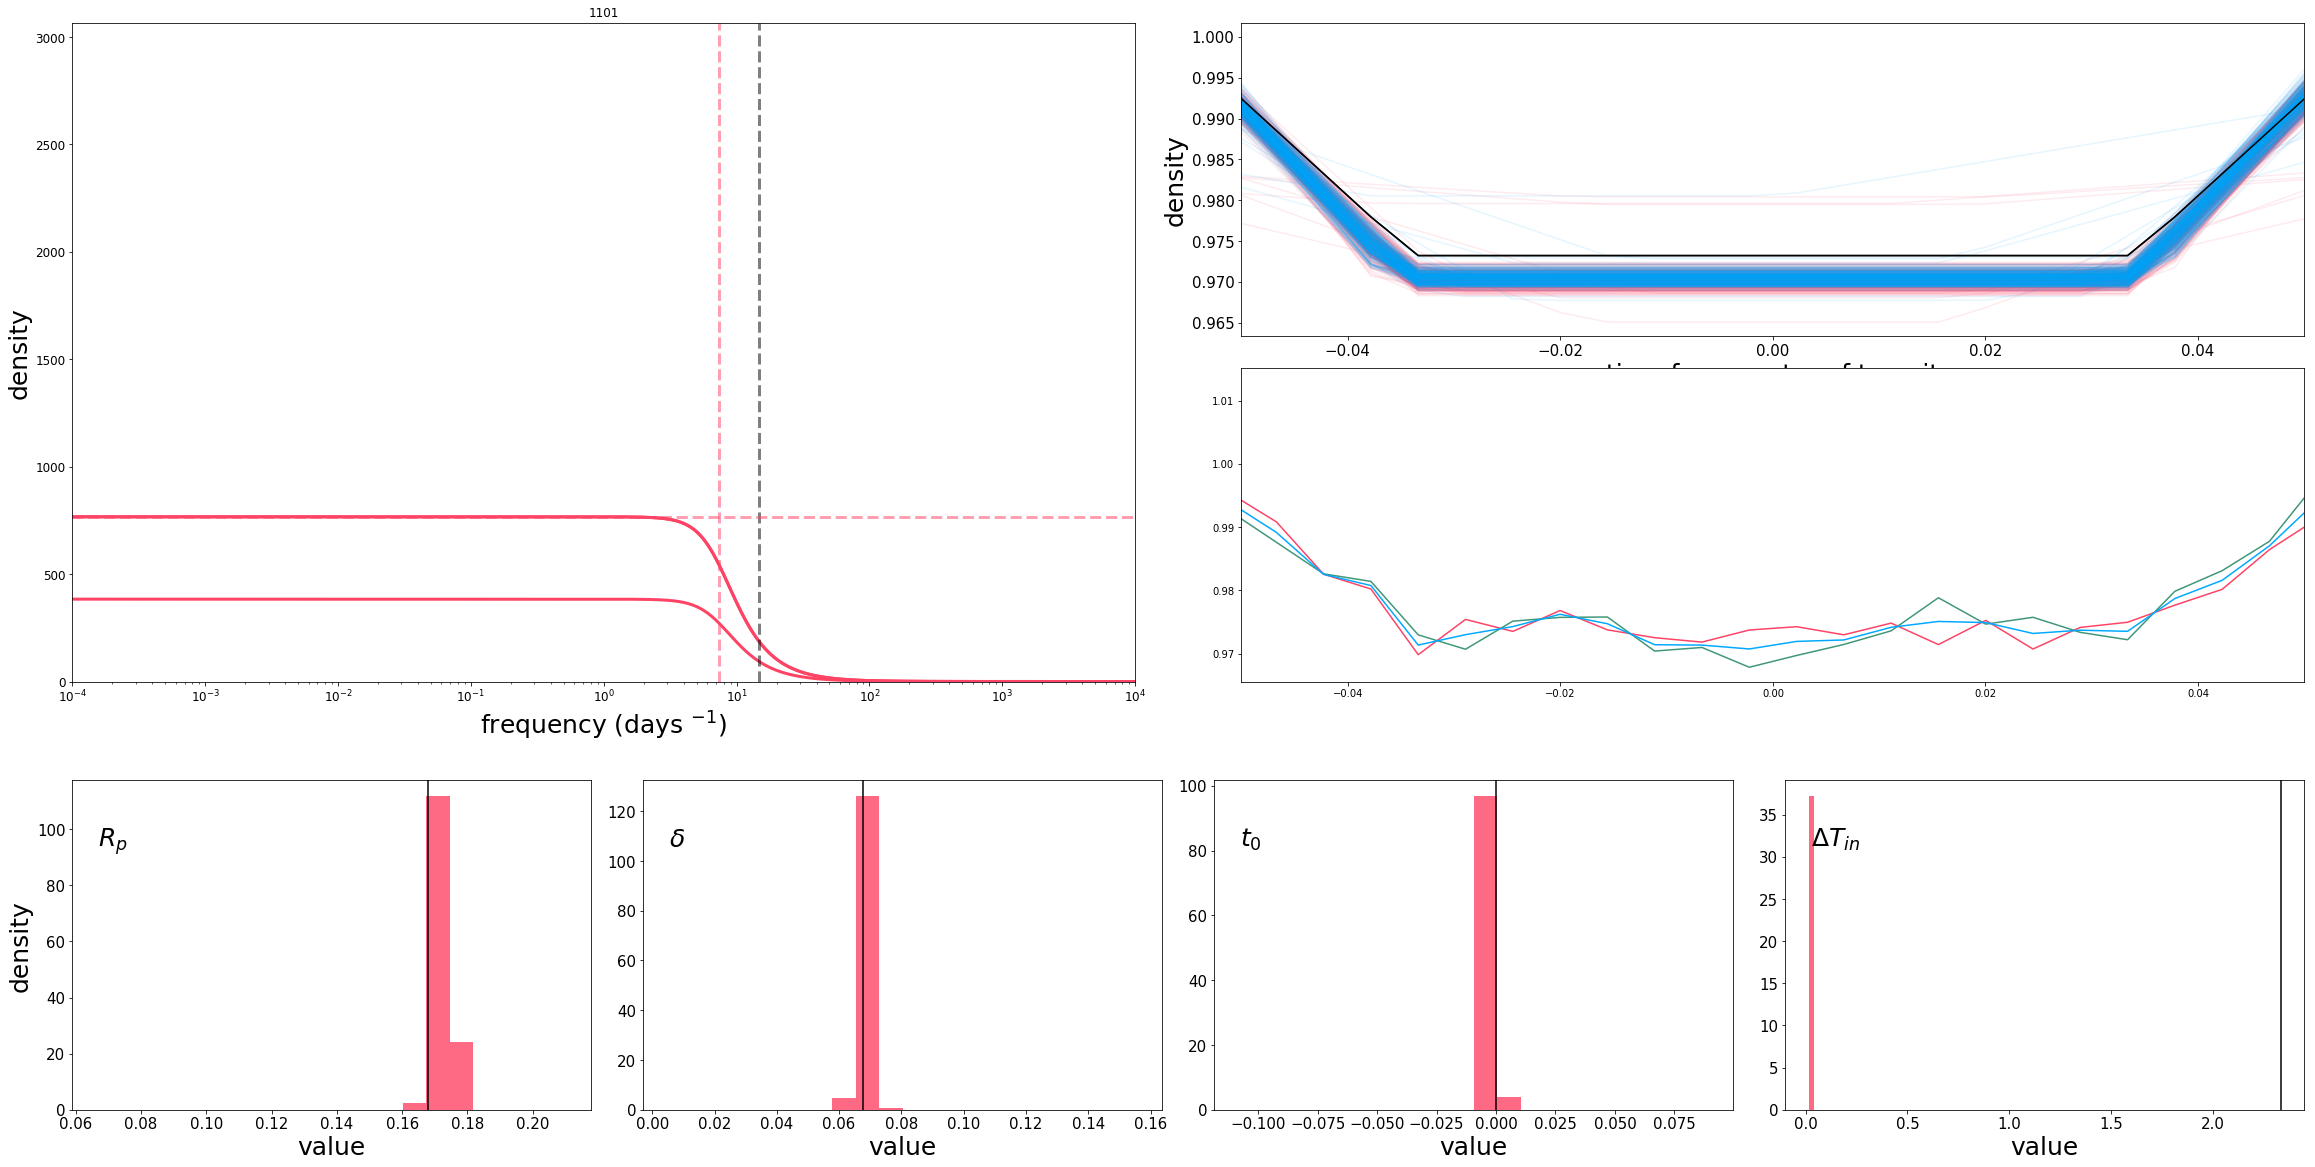

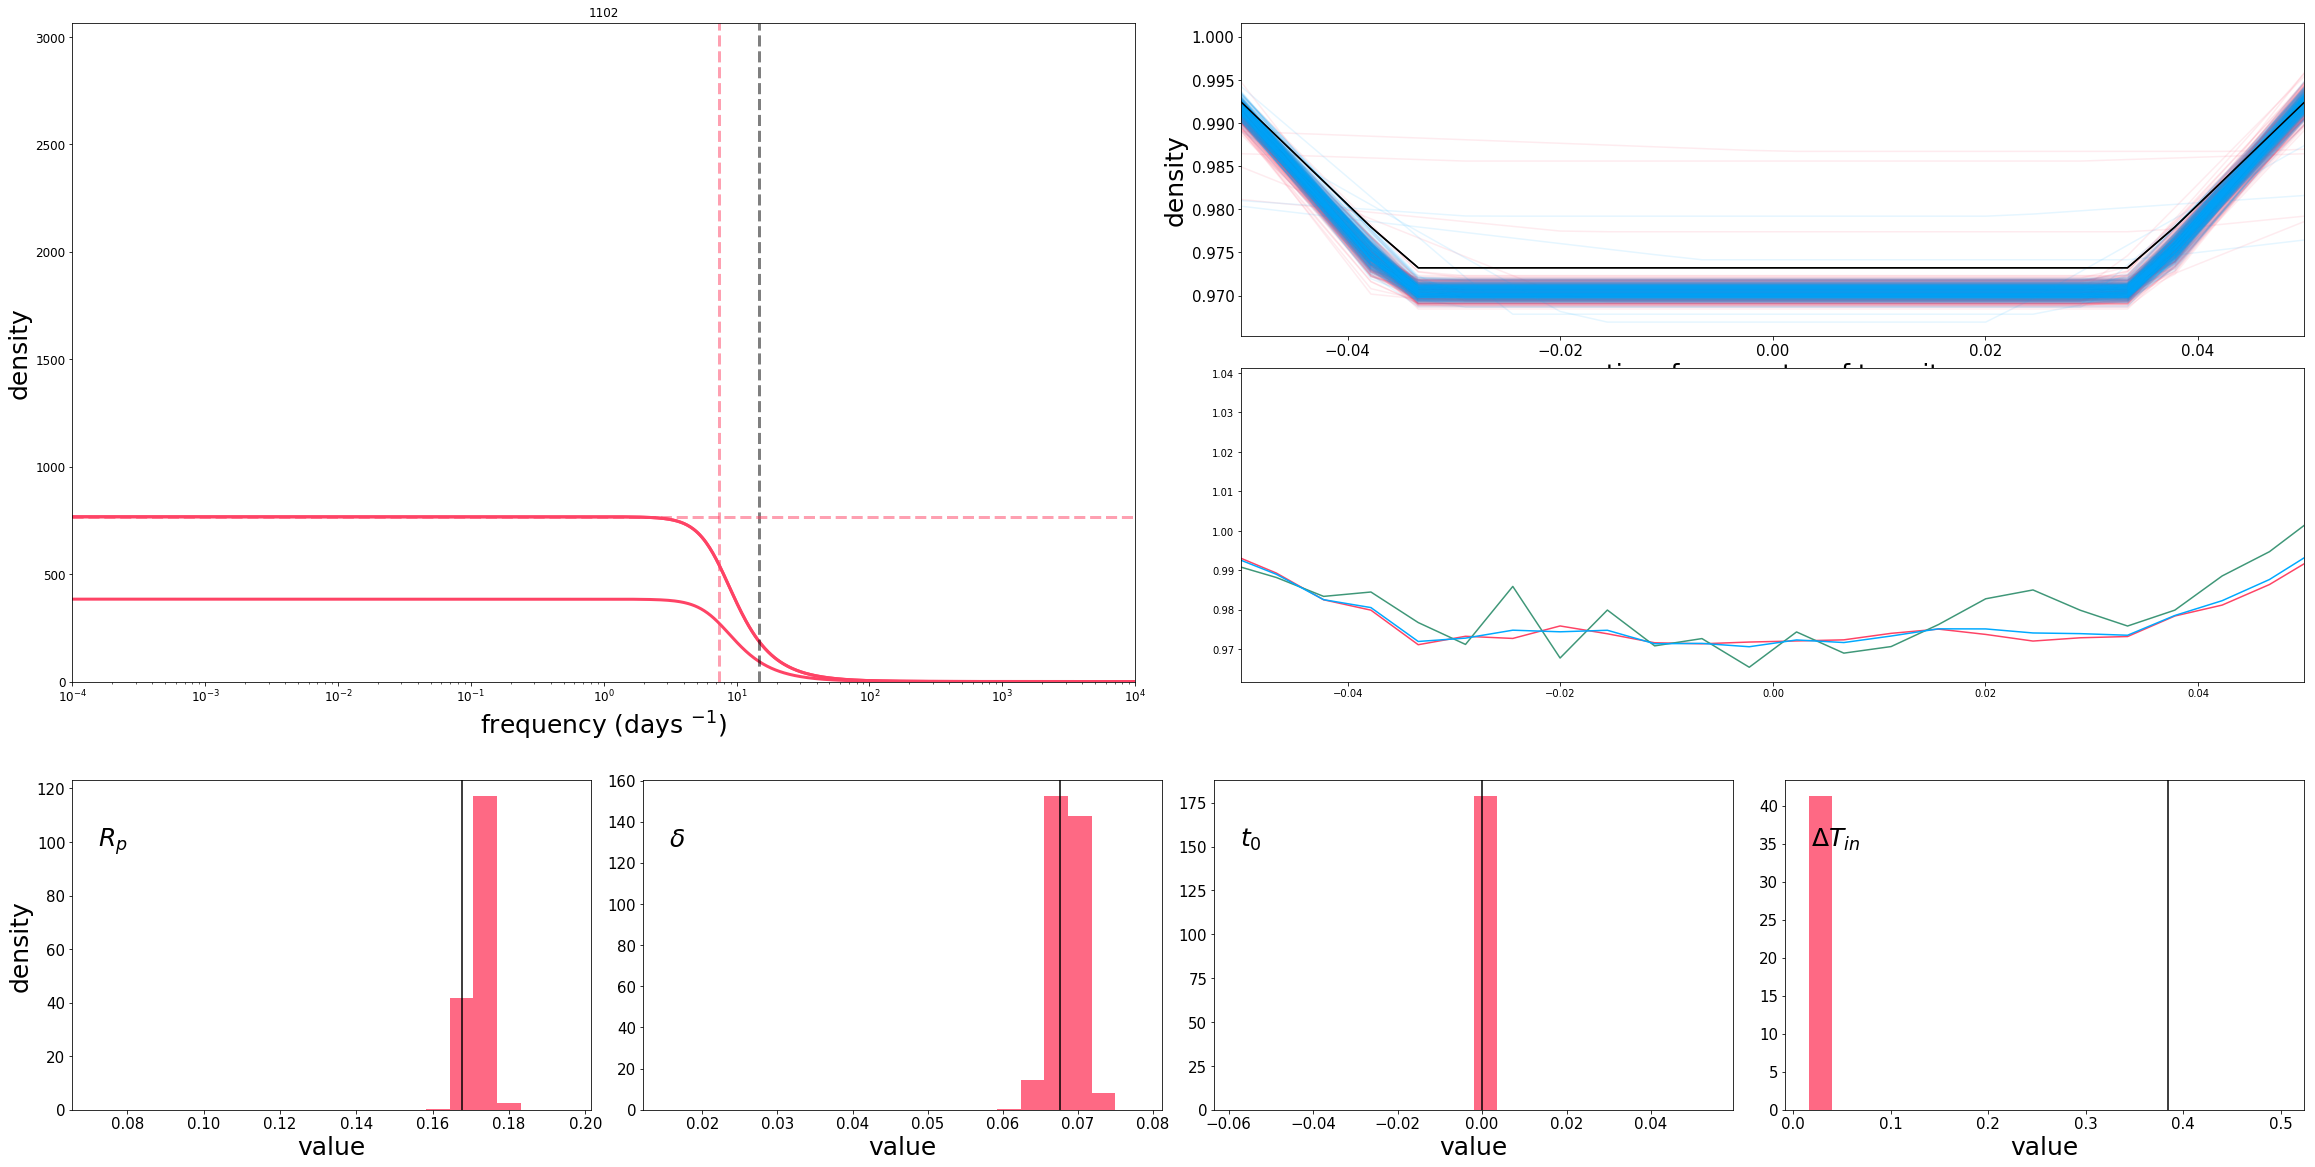

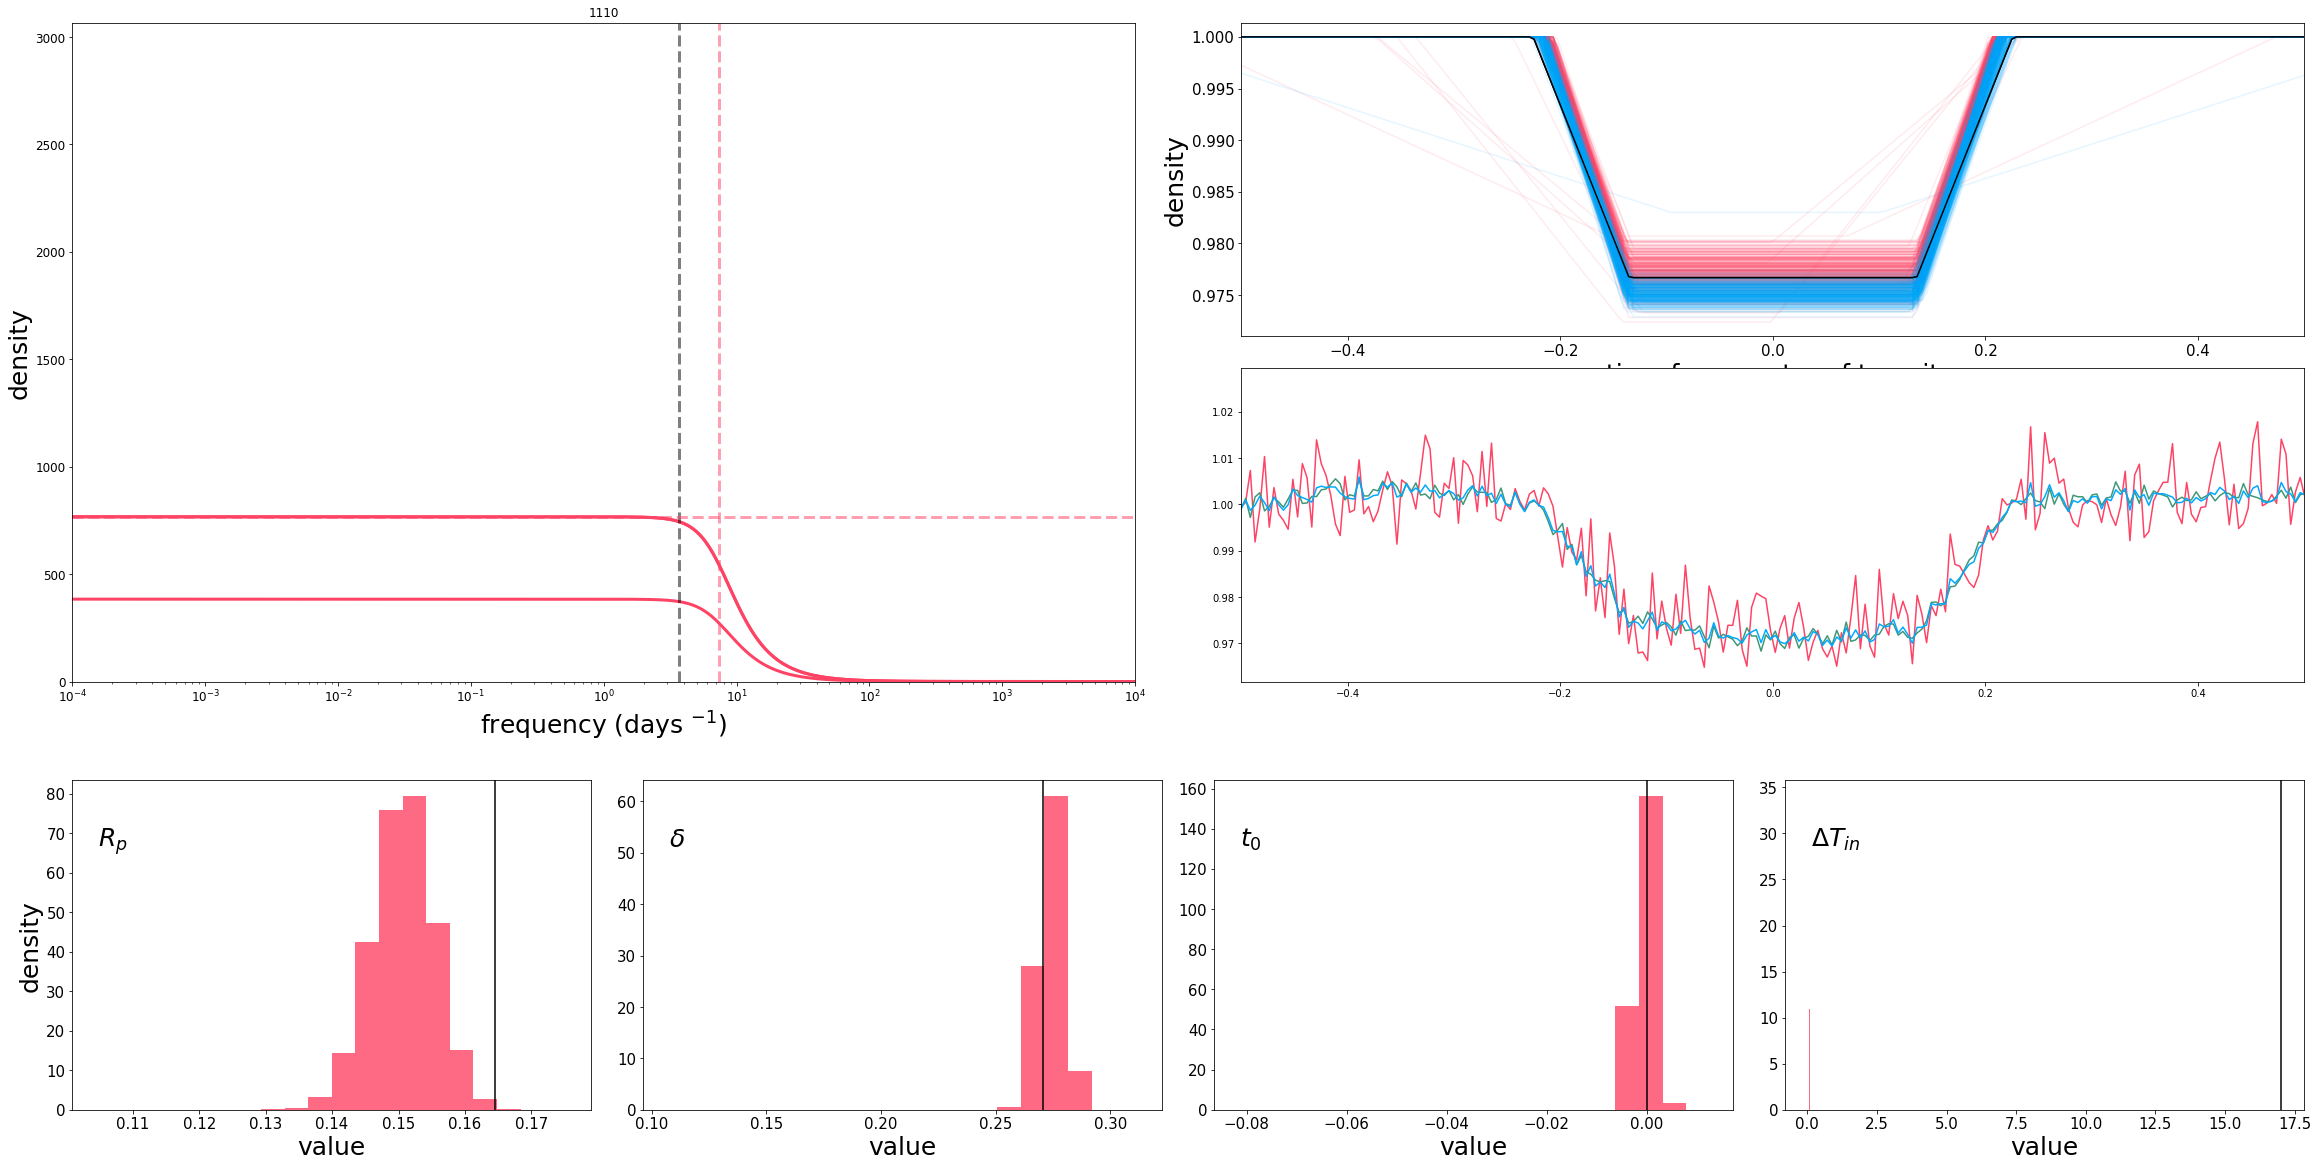

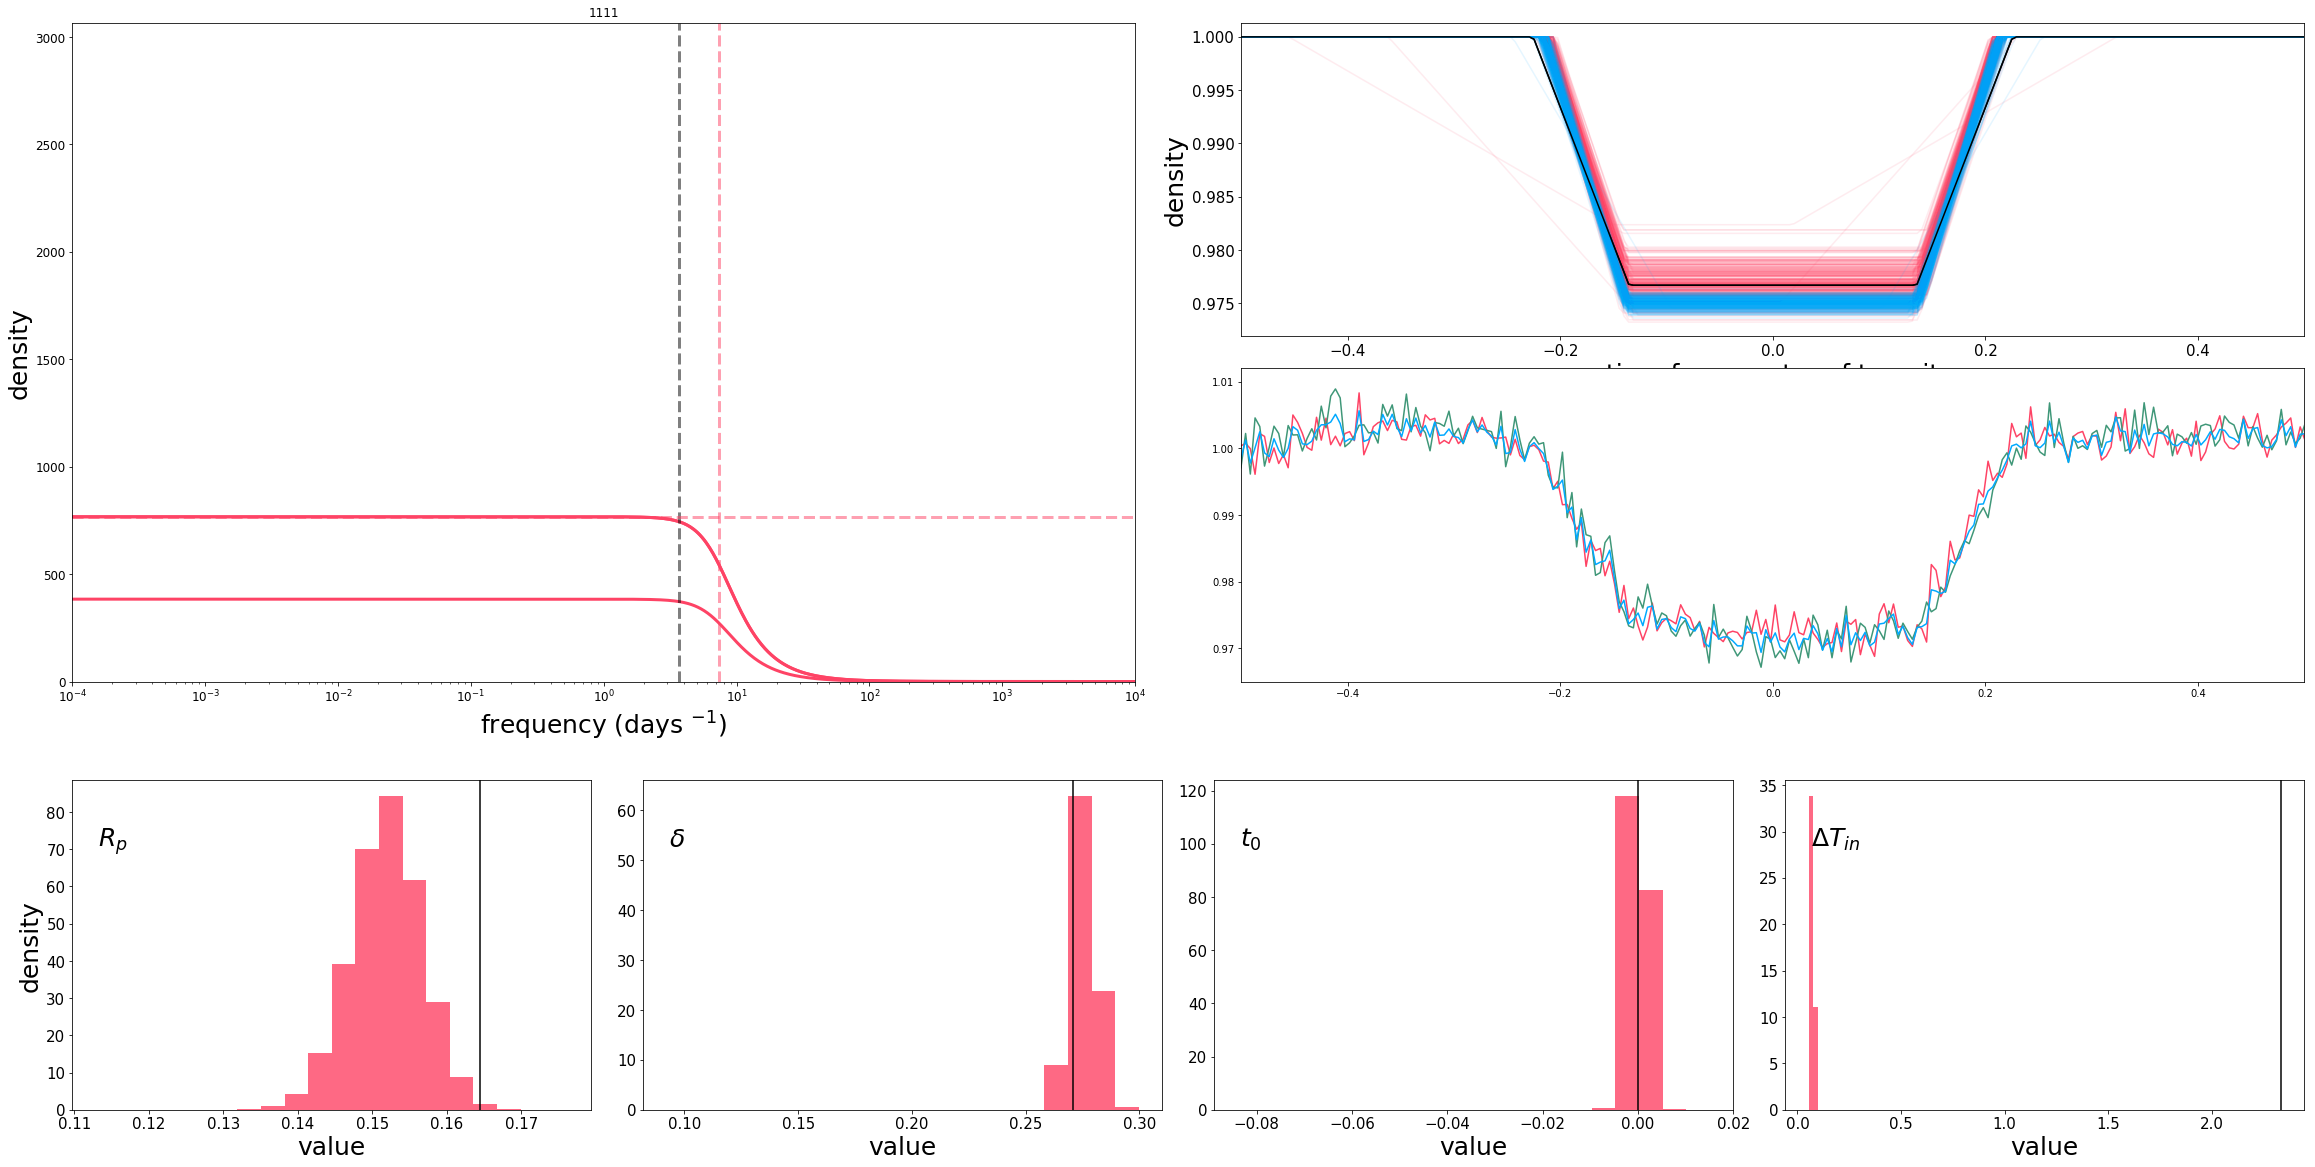

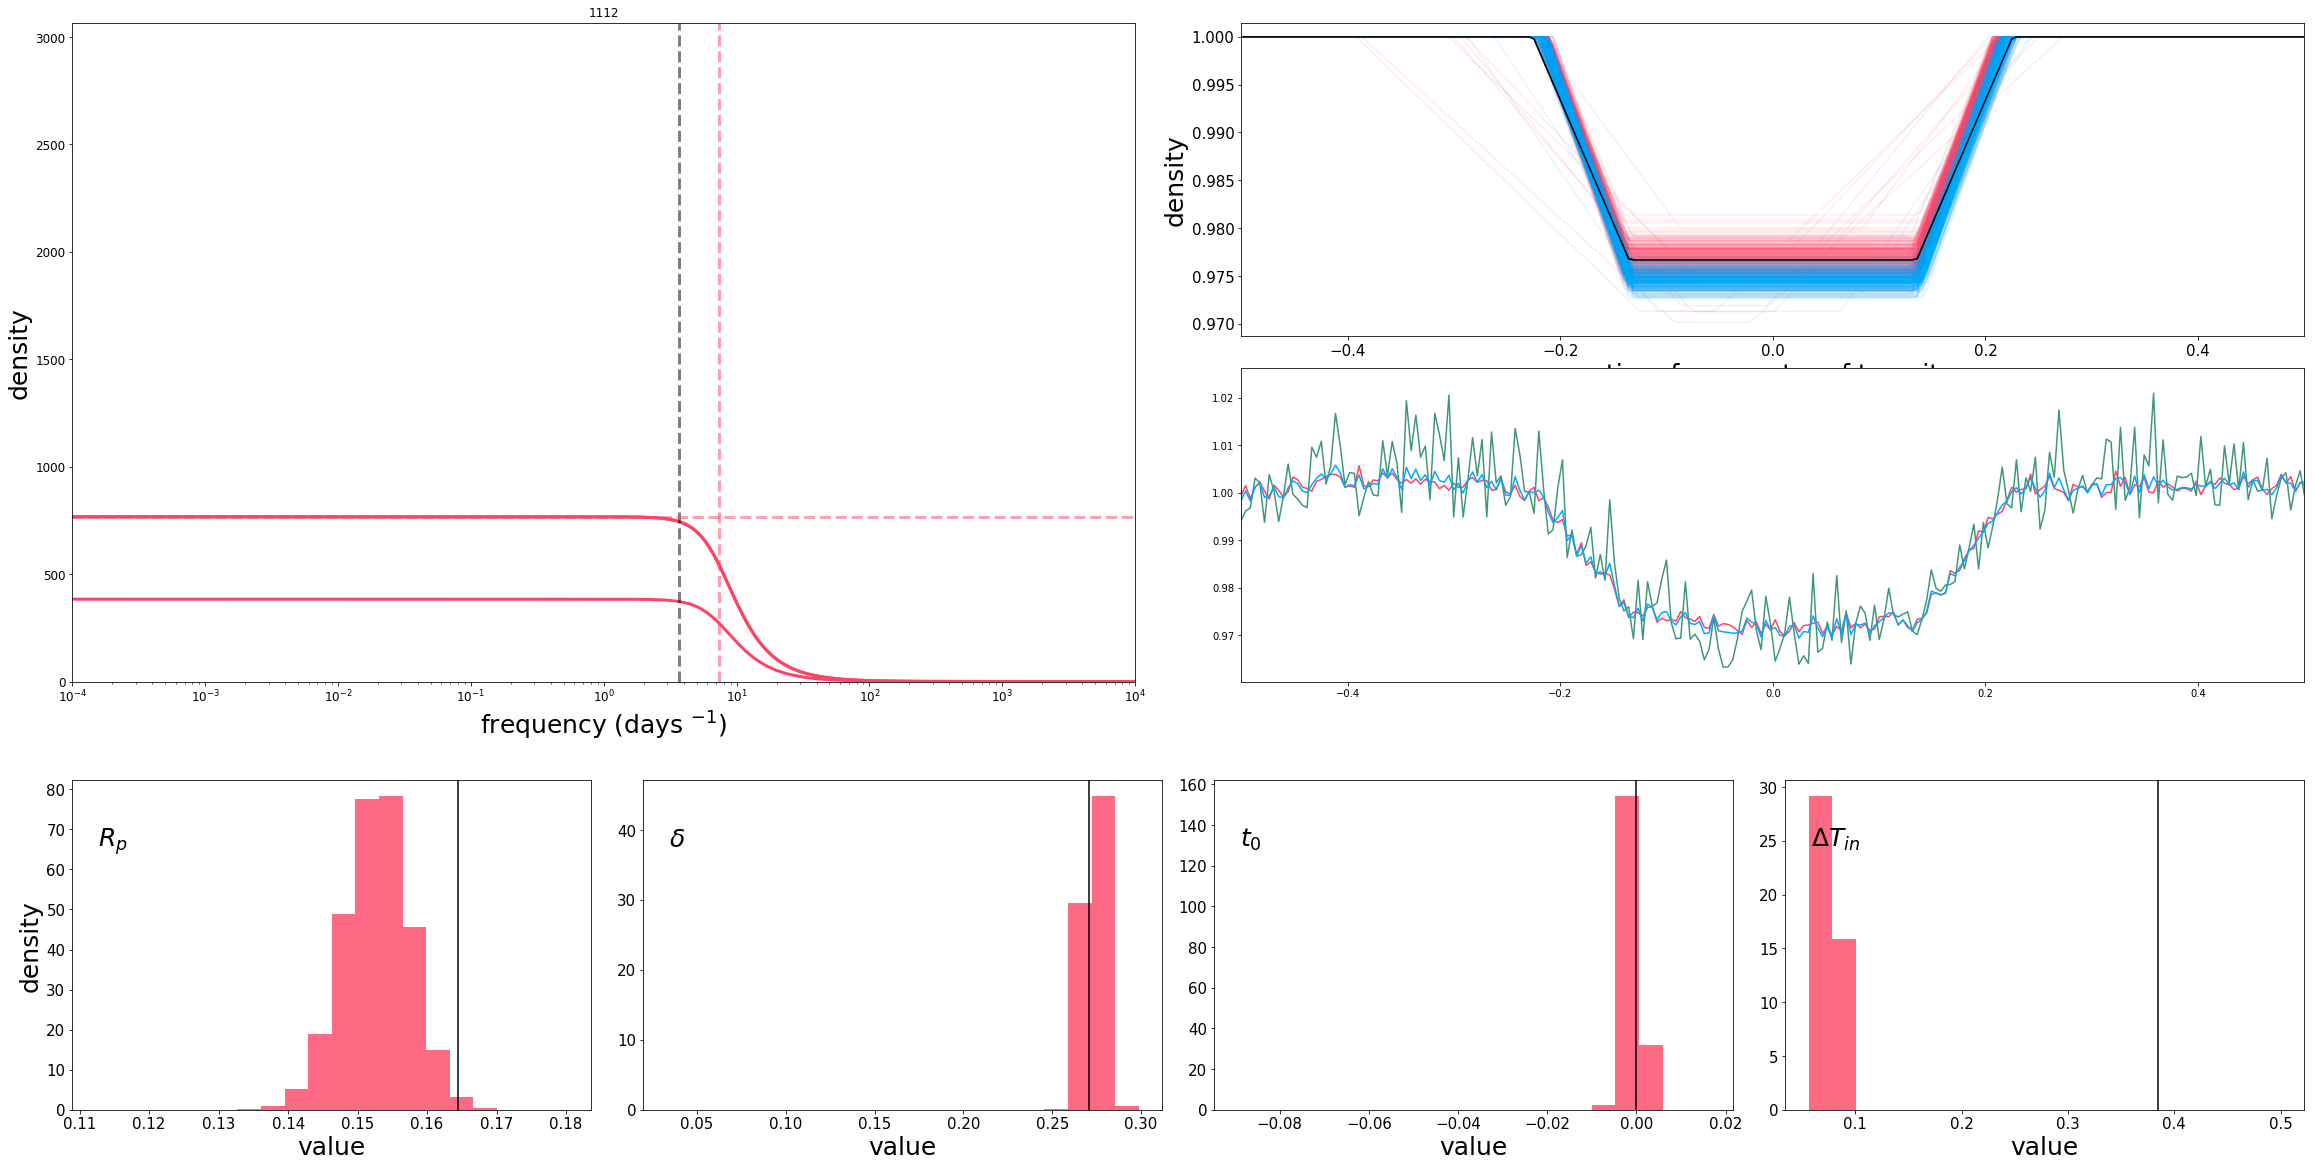

In [27]:
import matplotlib.gridspec as gridspec
imp.reload(plots)

truthpath = "hyak/data/trapezoid/transit_nonoise{0}.txt"
monopath = "/Users/tgordon/qual/qual.jl/hyak/data/trapezoid/simmono{0}.jls"
polypath = "/Users/tgordon/qual/qual.jl/hyak/data/trapezoid/simpoly{0}.jls"
datapath = "/Users/tgordon/qual/qual.jl/hyak/data/trapezoid/transit{0}.txt"
ids = np.loadtxt("hyak/input/codes.in", dtype=str)
trueparams = np.loadtxt("hyak/input/params.in")
red = (0.996, 0.263, 0.396)
blue = (0.0,0.663,1.0)
green = (0.247,0.592,0.471)

def make_plots(runcode, truths, annotate=False, legend=False):
    i, j, k, l = int(runcode[0]), int(runcode[1]), int(runcode[2]), int(runcode[3])
    inds = np.random.randint(10000, size=300)
    
    fig = pl.figure(figsize=(40, 20))
    outer = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.2,)
    top = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[0], wspace=0.1)
    bottom = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[1], wspace=0.1)
    topright = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=top[1], hspace=0.1)

    axs = [pl.subplot(bottom[i]) for i in range(4)]
    axs = plots.make_histogram(axs, monopath.format(runcode), polypath.format(runcode), ['rp', 'd', 't0', 'tin'], [truths[2], truths[3], truths[9], truths[4]], fontsize=25, chain=slice(0, 4), paramlabels=[r'$R_p$', r'$\delta$', r'$t_0$', r'$\Delta T_{in}$'])
    [(axs[i].set_xlabel("value", fontsize=25), axs[i].tick_params(labelsize=15)) for i in range(4)]
    axs[0].set_ylabel("density", fontsize=25)

    
    toprighttop = pl.subplot(topright[0])
    toprighttop = plots.plot_samples(toprighttop, monopath.format(runcode), truthpath.format(runcode), ind=inds, shape="trapezoid");
    toprighttop = plots.plot_samples(toprighttop, polypath.format(runcode), truthpath.format(runcode), ind=inds, color="blue", shape="trapezoid")
    if k == 0:
        toprighttop.set_xlim(-0.05, 0.05)
    else:
        toprighttop.set_xlim(-0.5, 0.5)
    #toprighttop.set_xlim(-1, 1)
    toprighttop.set_xlabel("time from center of transit", fontsize=25)
    toprighttop.set_ylabel("normalized flux", fontsize=15)
    toprighttop.tick_params(labelsize=15)
    toprighttop.set_ylabel("density", fontsize=25)
    
    toprightbottom = pl.subplot(topright[1])
    data = np.loadtxt(datapath.format(runcode))
    t, r, g, b = [data[:,i] for i in range(4)]
    toprightbottom.plot(t, r, color=red)
    toprightbottom.plot(t, g, color=green)
    toprightbottom.plot(t, b, color=blue)
    if k == 0:
        toprightbottom.set_xlim(-0.05, 0.05)
    else:
        toprightbottom.set_xlim(-0.5, 0.5)

    top0 = pl.subplot(top[0])
    top0 = plots.make_psd_plot(top0, log_S0=log_s, log_w0=log_w, log_wn=np.sqrt(truths[0]**2+truths[1]**2)/2, rp=truths[2], d=truths[3], c=truths[5], log_Q=log_q, annotate=annotate, legend=legend, fontsize=25)
    top0.set_ylabel("density", fontsize=25)
    return fig

def make_hists(axs, runcode, truths):
    
    i, j, k, l = int(runcode[0]), int(runcode[1]), int(runcode[2]), int(runcode[3])
    axs = plots.make_histogram(axs, 
                               monopath.format(runcode), 
                               polypath.format(runcode), 
                               ['rp', 'd', 't0', 'tin'], 
                               [truths[2], truths[3], truths[9], truths[4]], 
                               fontsize=50, 
                               chain=slice(0, 4), 
                               paramlabels=[r'$R_p$', r'$\delta$', r'$t_0$', r'$\Delta T_{in}$'])
    return axs
#    
for i, runcode in enumerate(ids):
    fig = make_plots(runcode, trueparams[i])
    pl.title(runcode)

In [29]:
arr = utils.estimate_autocor_time(monopath.format("1111"), 3)
#sim = utils.get_samples(monopath.format("1111"))
arr

array([10.68111965, 55.14412431, 29.99847956, 22.77580977, 76.65322381,
       35.08689445, 86.0755058 , 16.45580285])

In [42]:
simcodes = np.loadtxt("hyak/input/codes.in", dtype=str)
for s in simcodes:
    print(np.mean([utils.estimate_autocor_time(monopath.format(s), i) for i in range(4)], axis=0))

[137.13706238 637.64535791 349.99869856  76.17303008 665.29544516
 396.61736519 405.09549807 616.62055571]
[ 23.53731279  93.48980826  57.52411079  31.70786471 113.54171121
  62.86031557 102.0692179   14.25376274]
[ 97.89309877 346.43047342  73.25318032  69.41122709 359.83797439
  79.49829639 295.03143033  39.39041405]
[11.38781228 58.44765983 40.43414182 39.95945636 85.8616075  41.67631412
 91.0569584  22.65050515]
[ 9.6903863  45.84138354 36.893536   36.75783075 68.38563992 36.6904067
 74.94000383 23.25294674]
[ 9.54072555 59.31634005 37.15359774 37.67269073 78.24115708 36.73125843
 82.08812901 21.0666687 ]
[ 11.11863968  73.77667921  75.28145539  63.05997399 100.85055465
  84.8416927  101.70738841  78.95279657]
[ 13.87162965 118.27815441  60.1558654   47.21379755 132.90903577
  61.70455172 134.34776293  63.4016772 ]
[ 12.04698516 100.26730045  52.9990673   58.25246182 116.53236354
  57.90192745 117.15870587  73.02162041]
[ 9.8974033  36.28413345 38.52459436 37.26985146 83.39115183 3